In [3]:
import numpy.random as rand
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

# Polynomial
class Individual:
    # c is the number of coefficients
    # d is the number of variables
    def __init__(self, c, d):
        # Generate normal distributed coefficients for each variable plus the intercept
        self.values = [[rand.normal() for _ in range(c + 1)] for _ in range(d)]
        self.fitness = None

    # The objective function is the squared error
    def evaluate(self, lookupTable):
        self.fitness = 0
        # For each input
        for x in lookupTable.keys():
            image = 0
            # For each variable
            for variable in self.values:
                # For each coefficient
                for power, coefficient in enumerate(variable):
                    # Compute polynomial image
                    image += coefficient * x ** power
            # Compute squared error
            target = lookupTable[x]
            mse = (target - image) ** 2
            self.fitness += mse

    # Mutation
    def mutate(self, rate):
        # Coefficients take a random uniform value in their neighbourhood
        self.values = [[rand.uniform(c - rate, c + rate) for c in variable]
                       for variable in self.values]

    # Display the DNA of the individual (the polynomial coefficients)
    def display(self):
        intercept = 0
        print ('Polynomial form')
        print ('---------------')
        for index, variable in enumerate(self.values):
            intercept += variable[0]
            for power, coefficient in enumerate(variable[1:]):
                print (str(coefficient) + ' * ' + 'x' + str(index) + \
                       '**' + str(power+1) + ' + ')
        print (intercept)

    def roundCoefficients(self):
        self.values = [[round(value, 1) for value in variable]
                       for variable in self.values] 
                
# List of polynomials
class Population:
    
    def __init__(self, c, d, size=100):
        # Create individuals
        self.individuals = [Individual(c, d) for _ in range(size)]
        # Store the best individuals
        self.best = [Individual(c, d)]
        # Mutation rate
        self.rate = 0.1
        # For dynamic plotting use matplotlib.pyplot.ion()
        plt.ion()

    def sort(self):
        self.individuals = sorted(self.individuals, key=lambda indi: indi.fitness)
                    
    def evaluate(self, lookupTable):
        for indi in self.individuals:
            indi.evaluate(lookupTable)

    def enhance(self, lookupTable):
        newIndividuals = []
        # Go through top 10 individuals
        for individual in self.individuals[:10]:
            # Create 1 exact copy of each top 10 individuals
            newIndividuals.append(deepcopy(individual))
            # Create 4 mutated individuals
            for _ in range(4):
                newIndividual = deepcopy(individual)
                newIndividual.mutate(self.rate)
                newIndividuals.append(newIndividual)
        # Replace the old population with the new population of offsprings
        self.individuals = newIndividuals
        self.evaluate(lookupTable)
        self.sort()
        # Store the new best individual
        self.best.append(self.individuals[0])
        # Increment the mutation rate if the population didn't change
        if self.best[-1].fitness == self.best[-2].fitness:
            self.rate += 0.01
        else:
            self.rate = 0.1
        
    def plot2D(self, x, y, generation):
        assert len(self.best[-1].values) == 1, 'Data points are not of dimension 1.'
        # x coordinates
        X = np.linspace(min(x), max(x))
        # y coordinates
        Y = [sum(c * x ** p
          for p, c in enumerate(variable))
          for variable in self.best[-1].values
          for x in X]
        # Clear the plot
        plt.clf()
        # Display the polynomial
        plt.plot(X, Y, c='blue')
        # Display the target points
        plt.scatter(x, y, c='red', s=100)
        plt.title('Generation : ' + str(generation) + ' / ' +
                  'Error : ' + str(self.best[-1].fitness))
        # Necessary for plt.ion()
        plt.pause(5e-324)

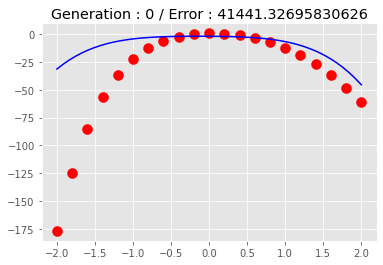

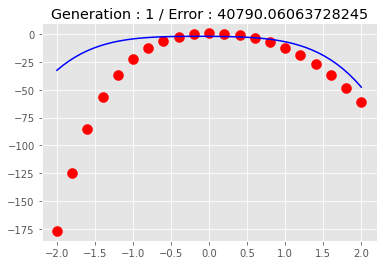

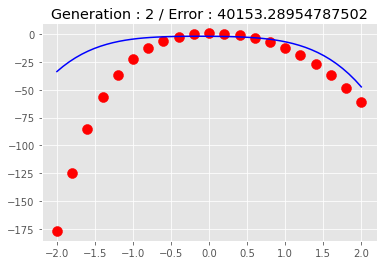

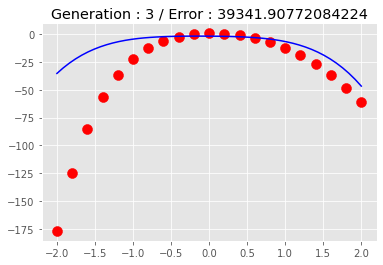

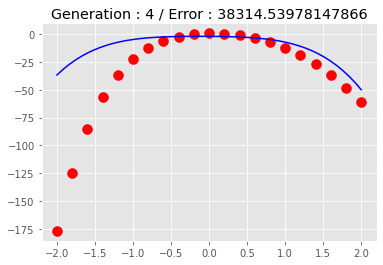

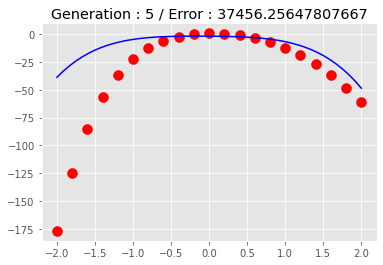

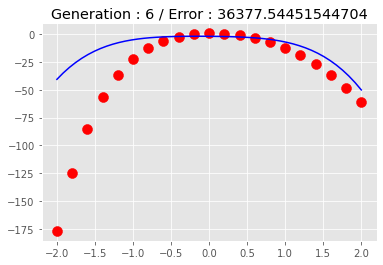

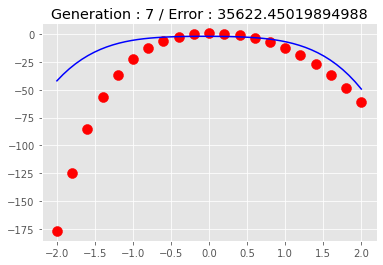

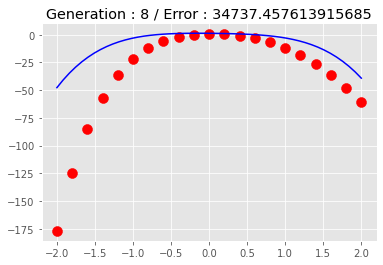

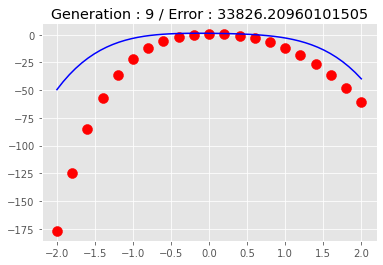

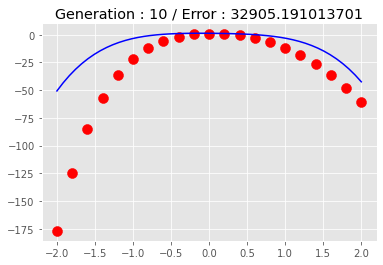

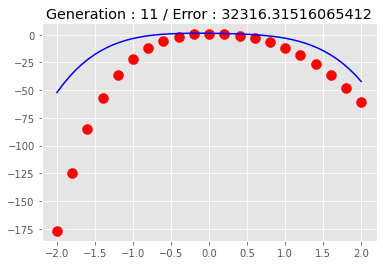

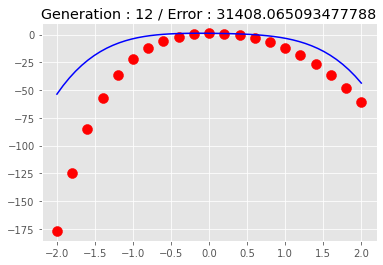

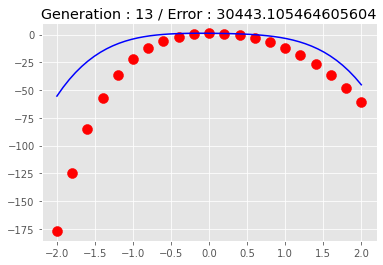

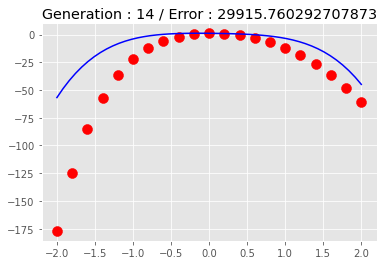

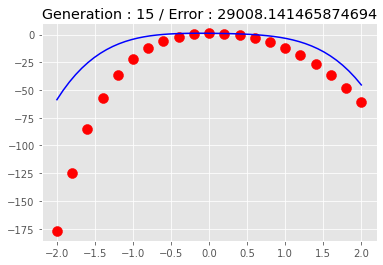

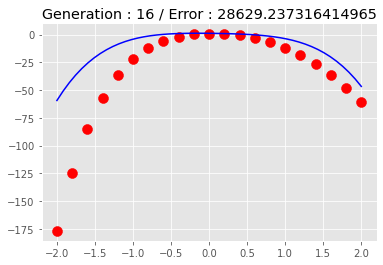

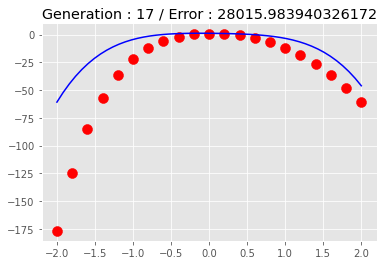

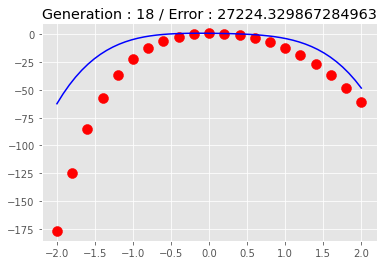

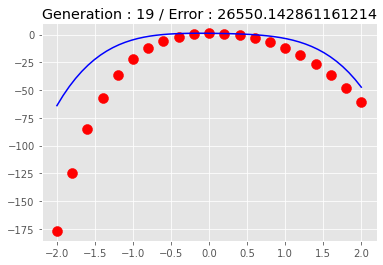

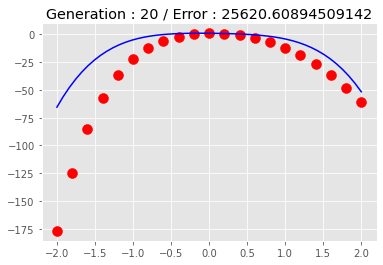

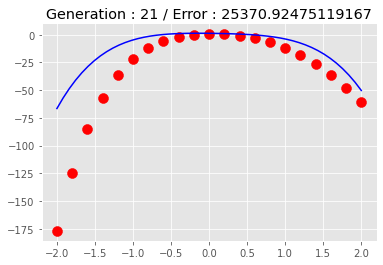

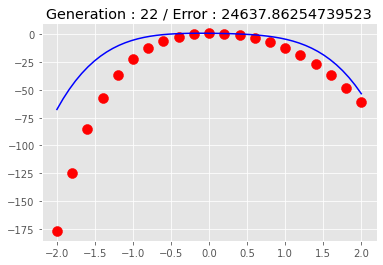

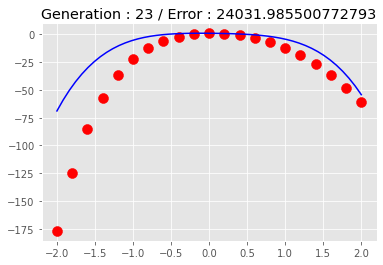

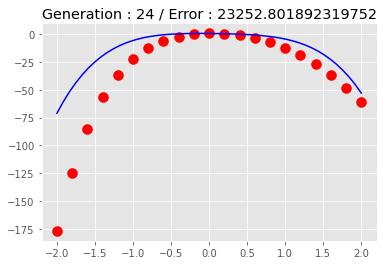

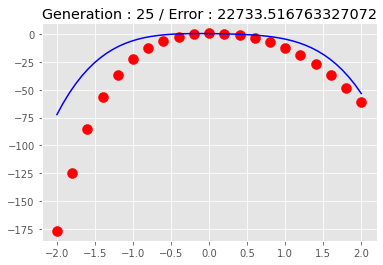

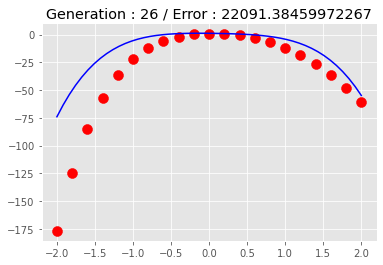

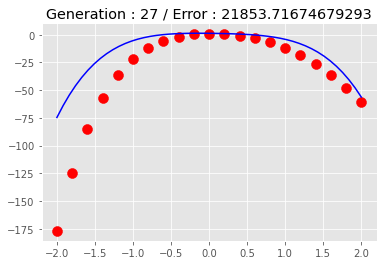

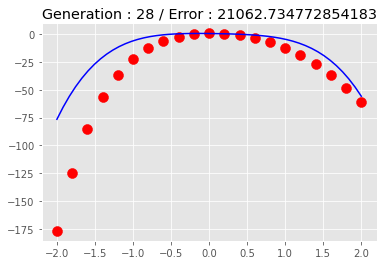

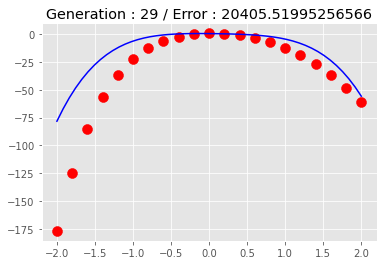

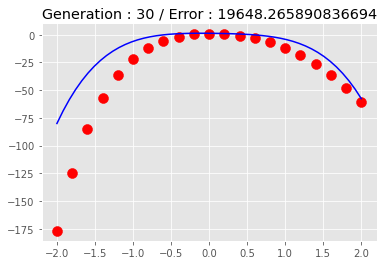

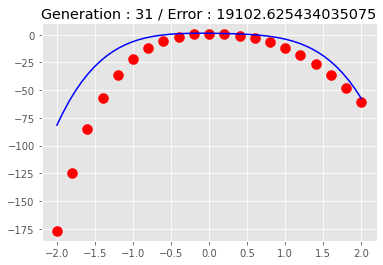

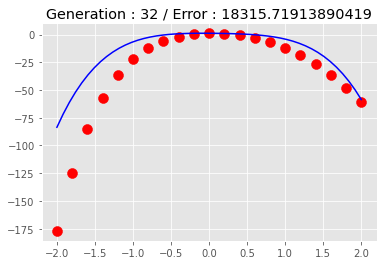

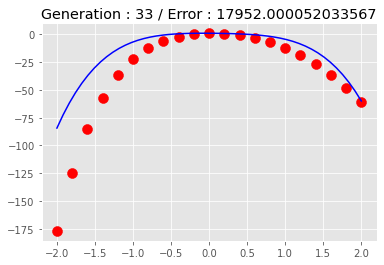

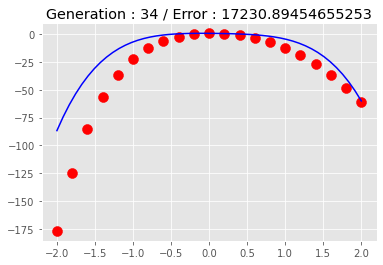

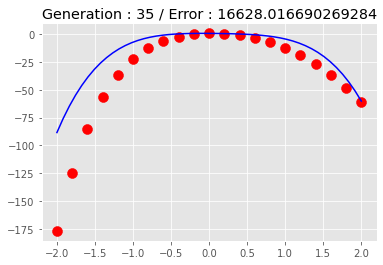

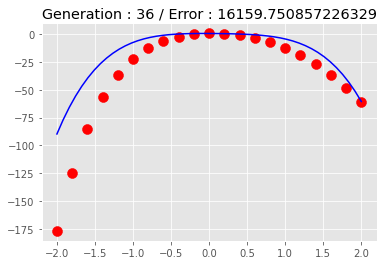

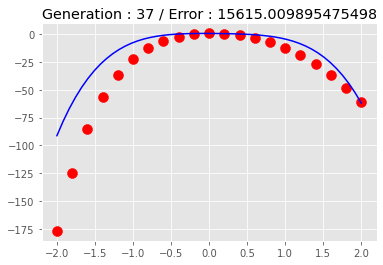

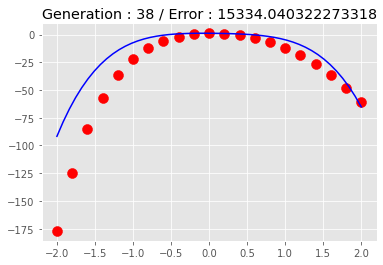

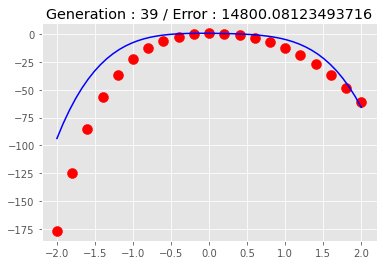

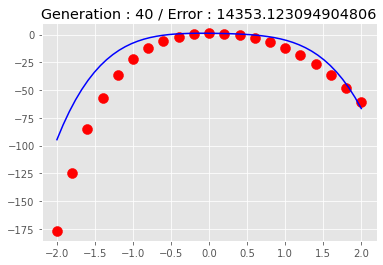

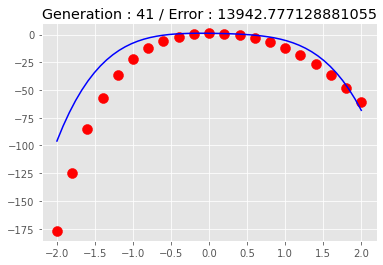

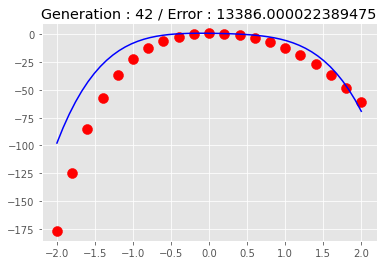

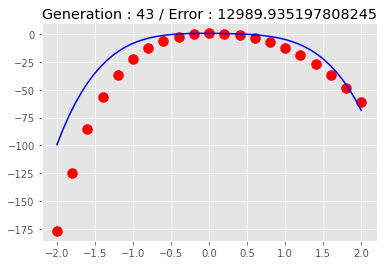

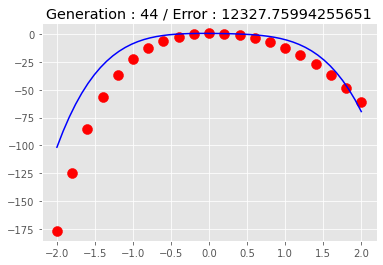

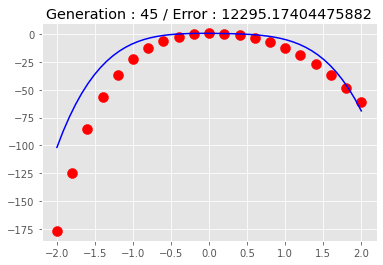

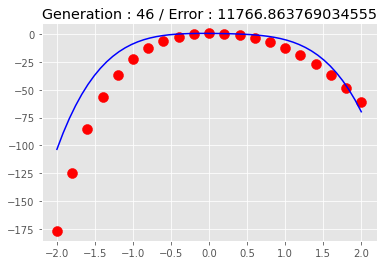

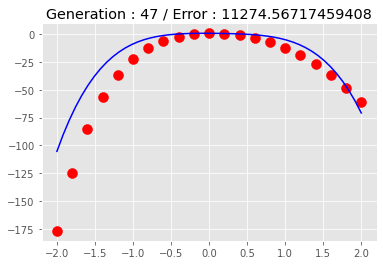

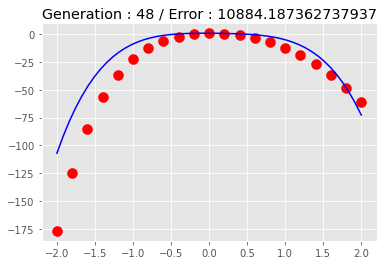

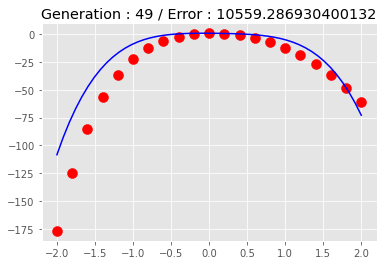

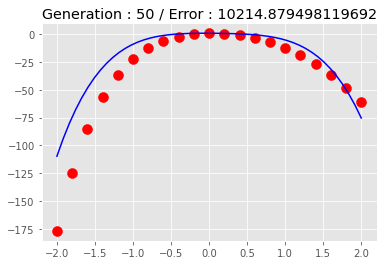

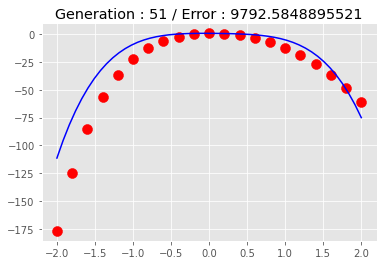

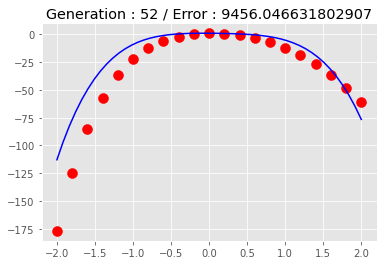

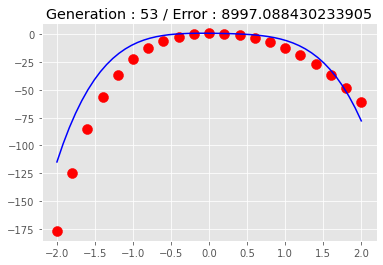

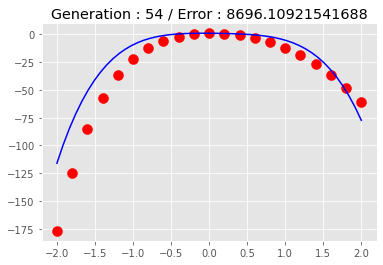

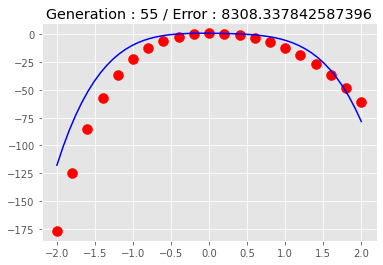

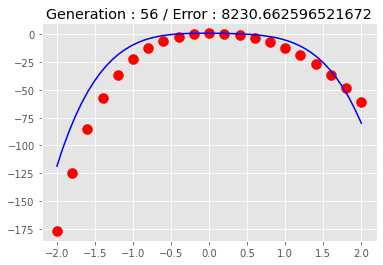

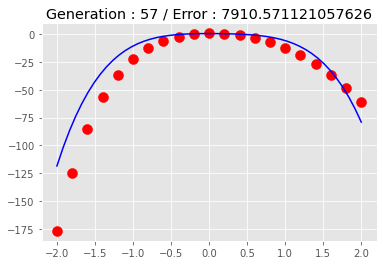

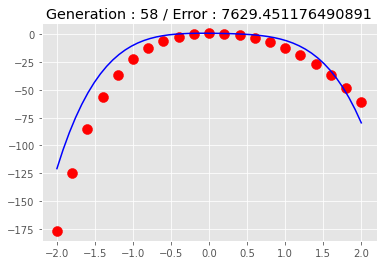

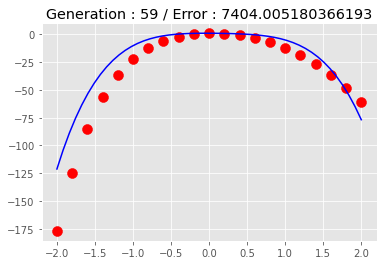

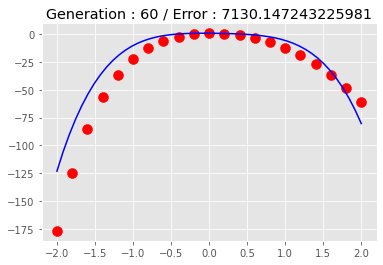

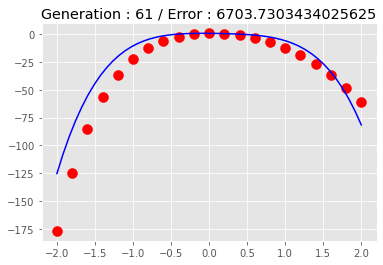

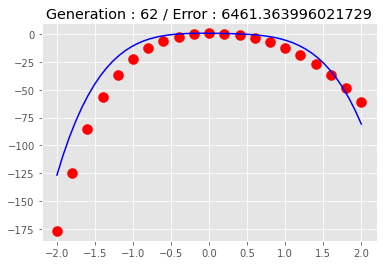

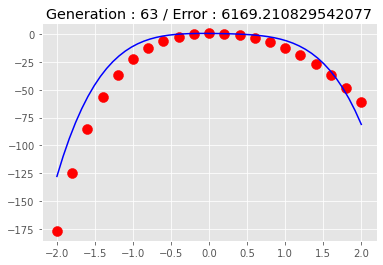

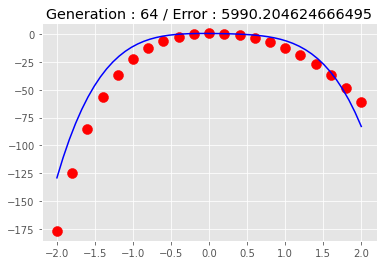

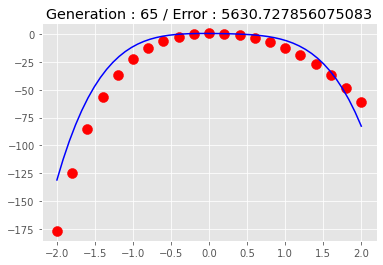

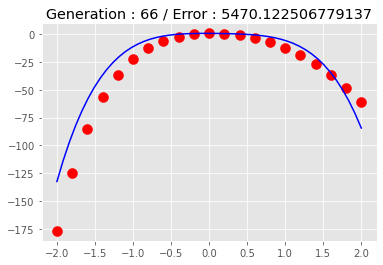

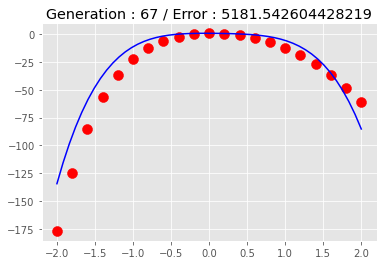

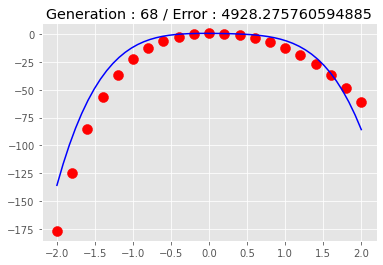

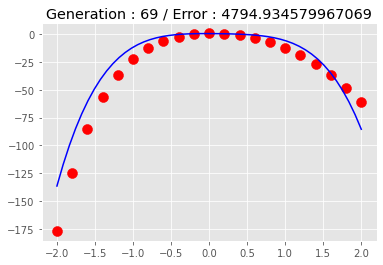

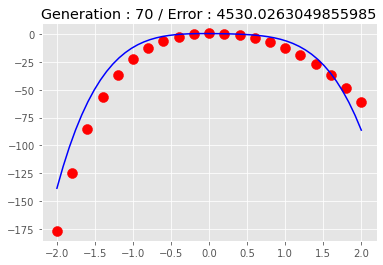

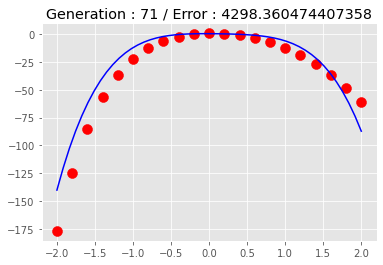

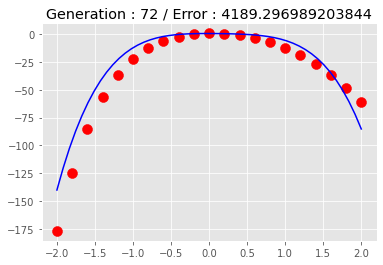

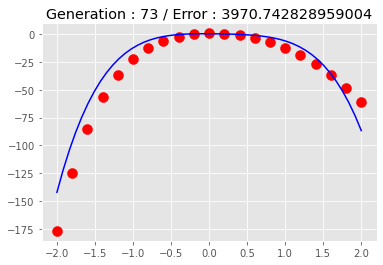

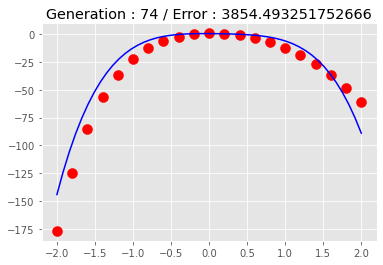

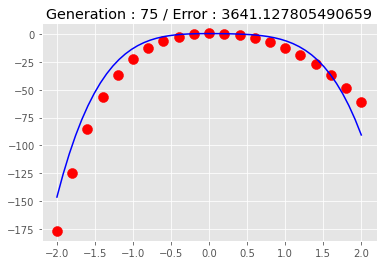

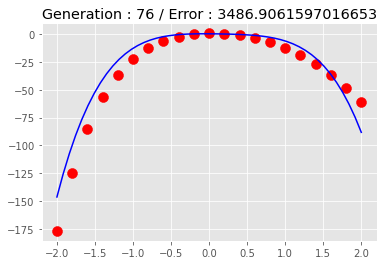

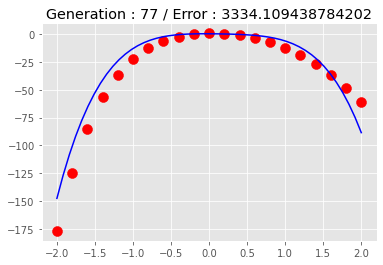

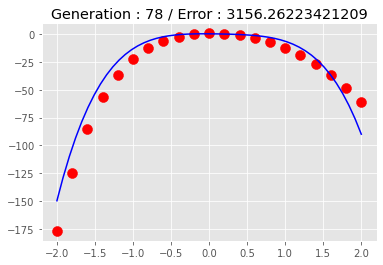

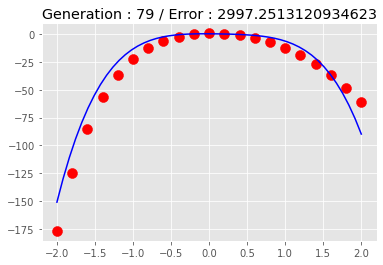

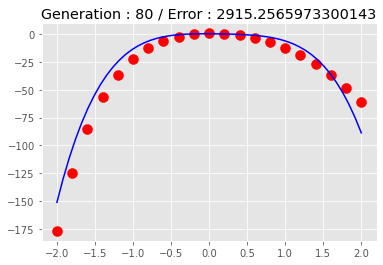

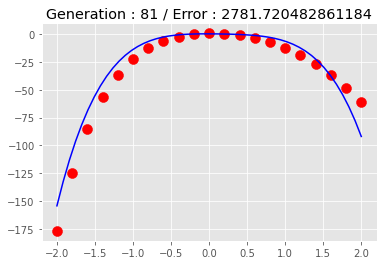

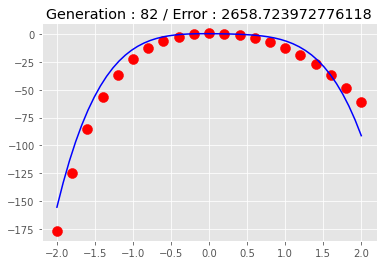

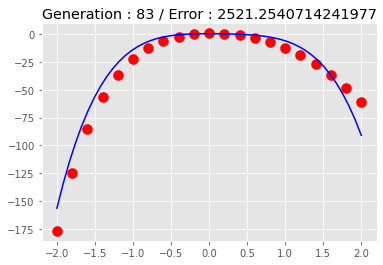

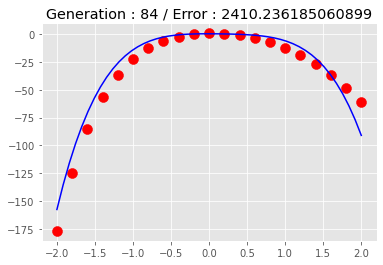

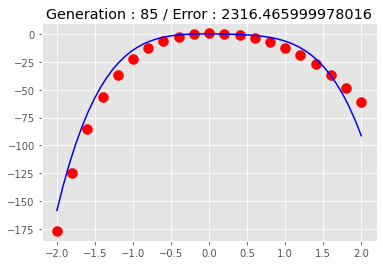

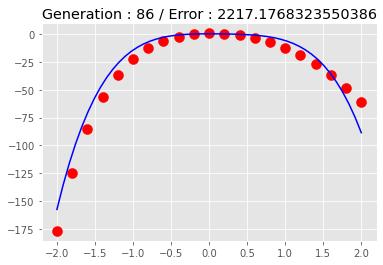

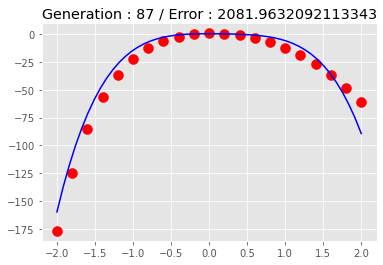

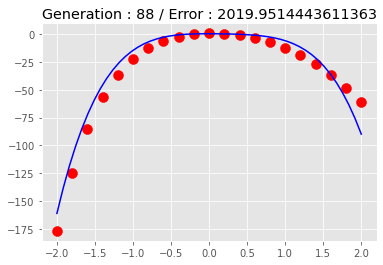

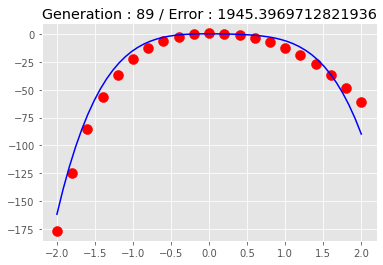

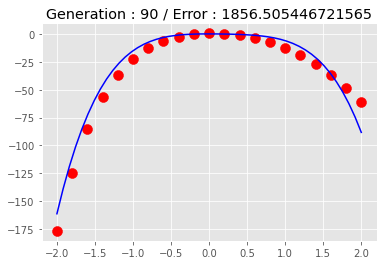

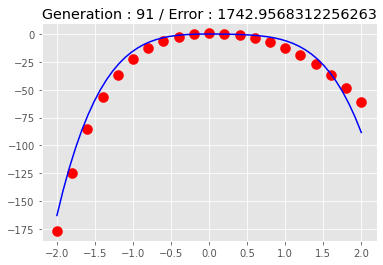

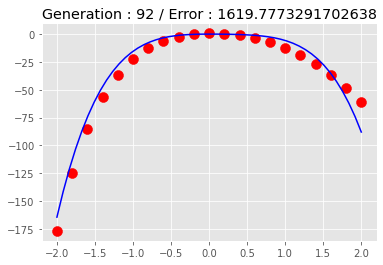

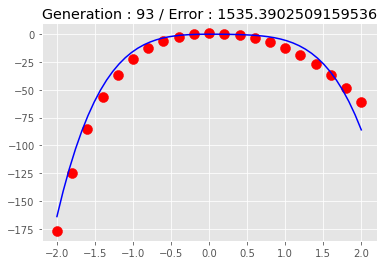

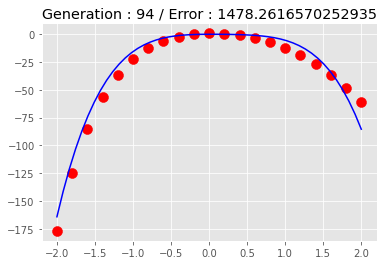

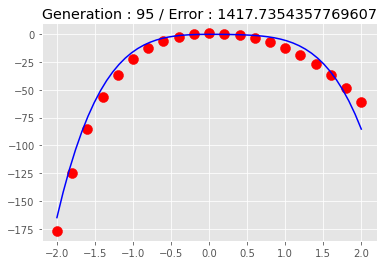

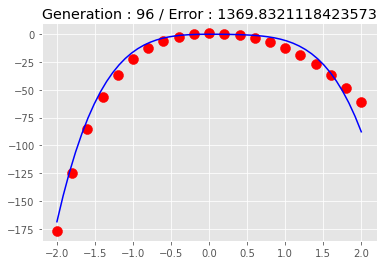

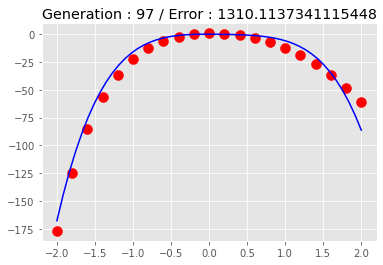

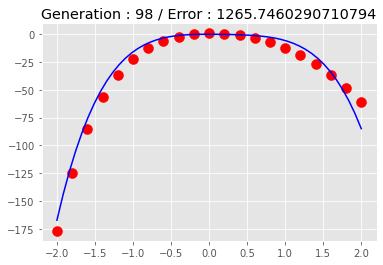

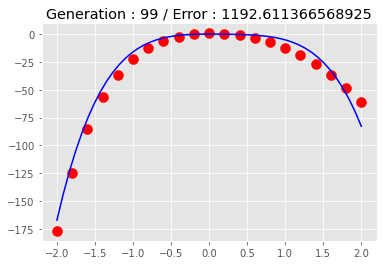

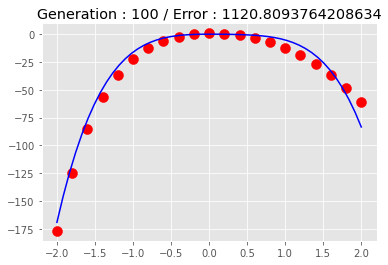

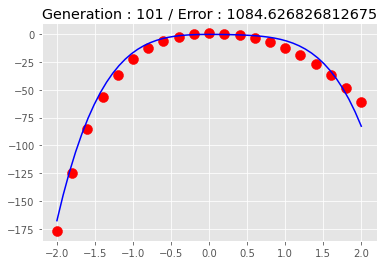

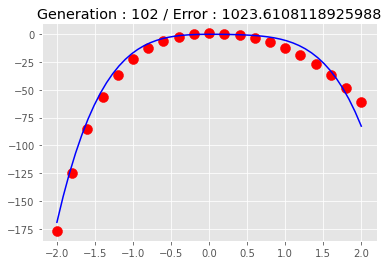

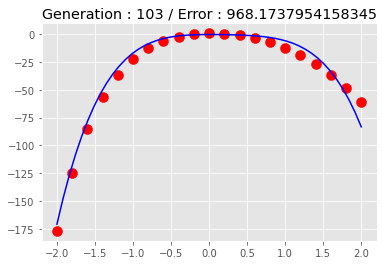

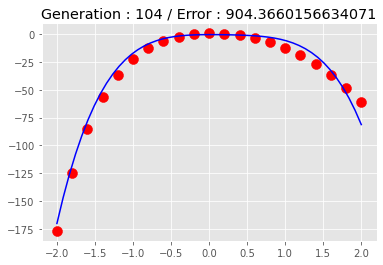

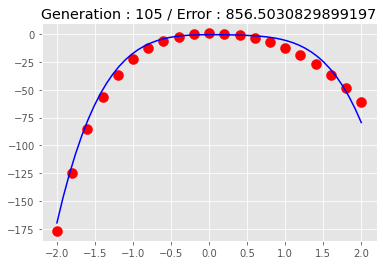

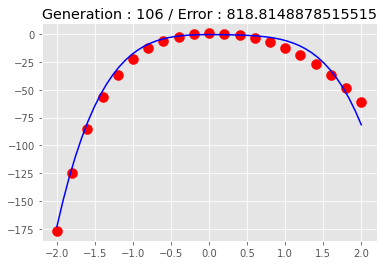

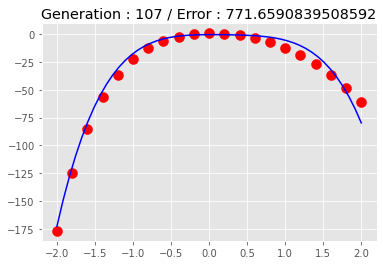

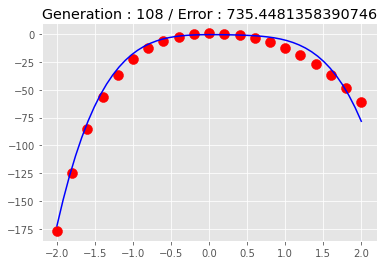

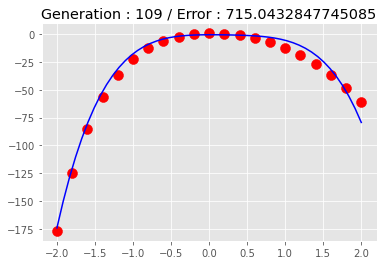

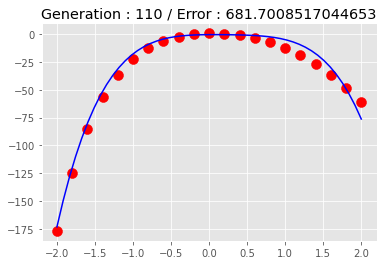

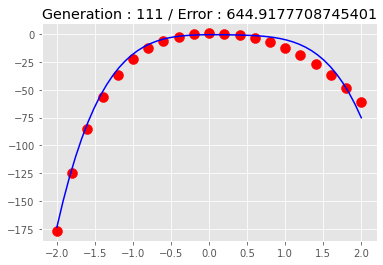

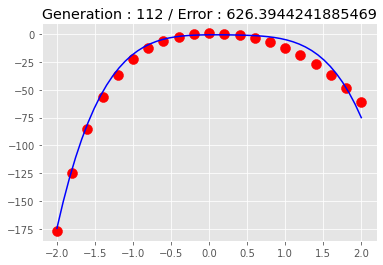

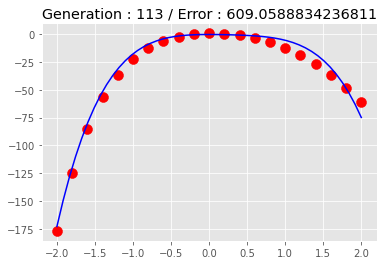

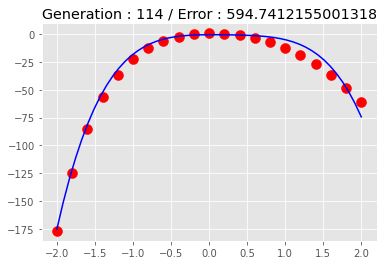

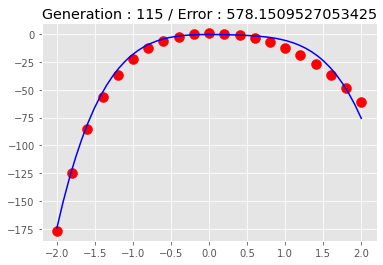

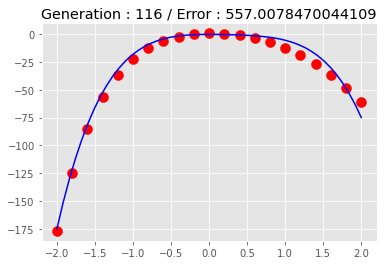

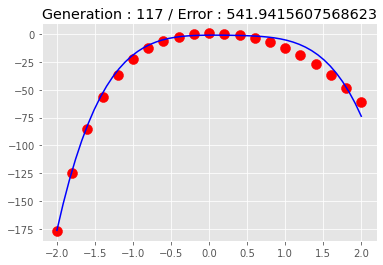

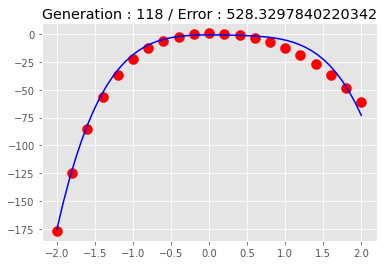

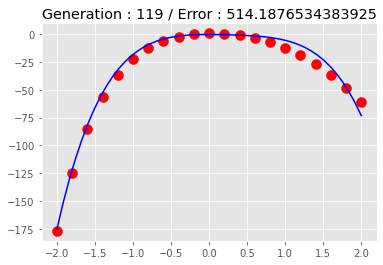

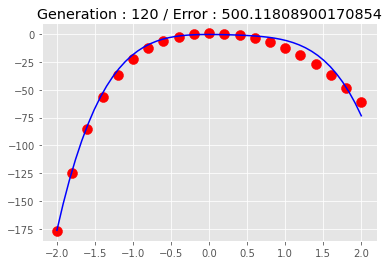

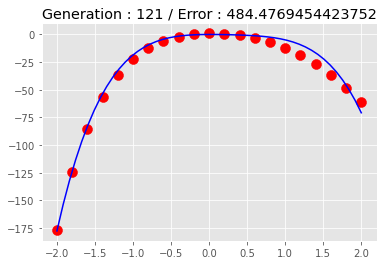

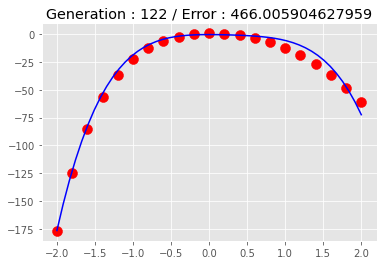

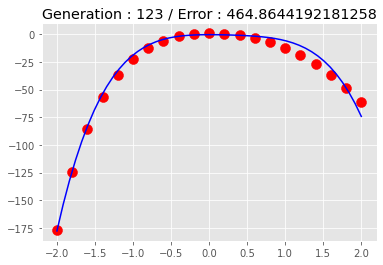

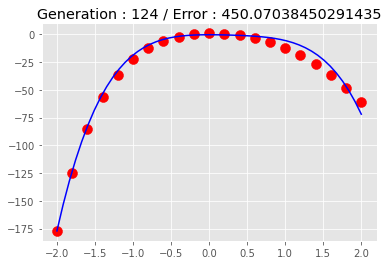

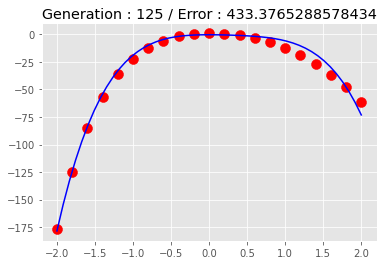

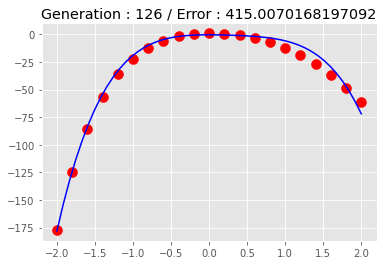

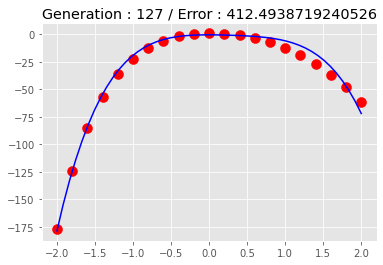

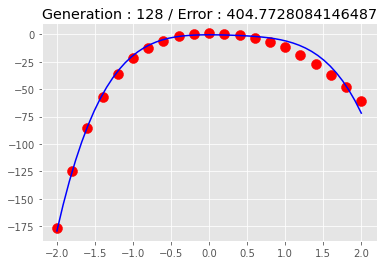

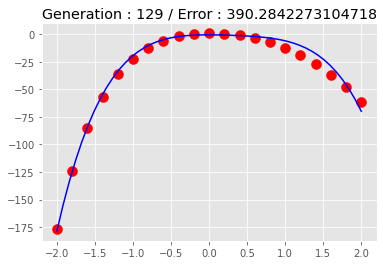

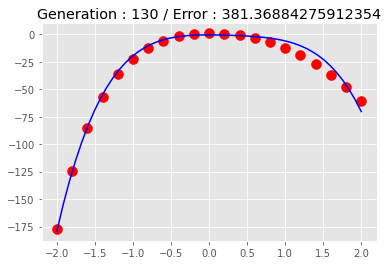

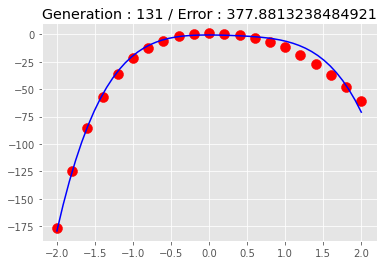

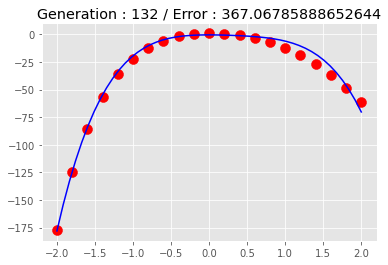

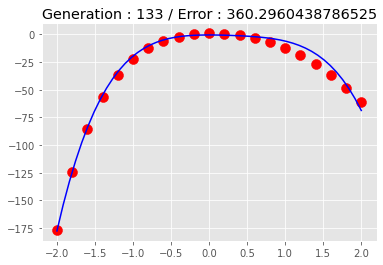

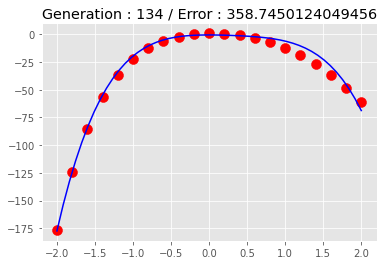

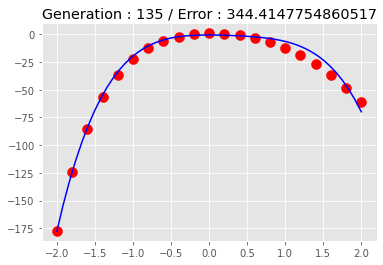

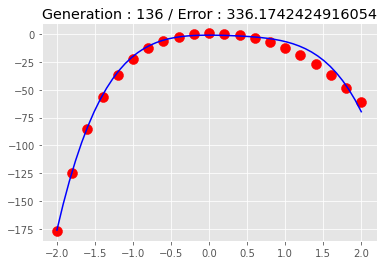

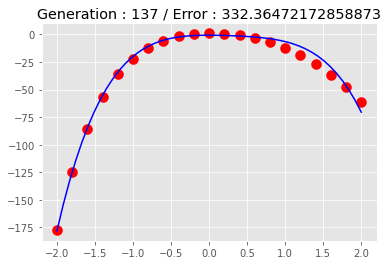

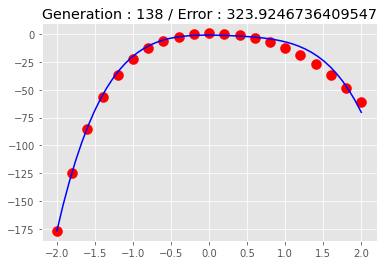

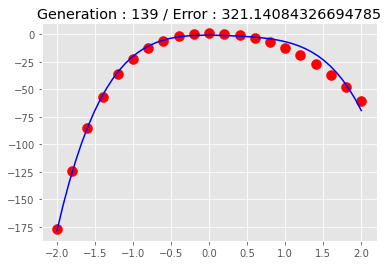

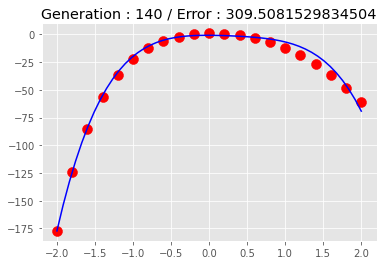

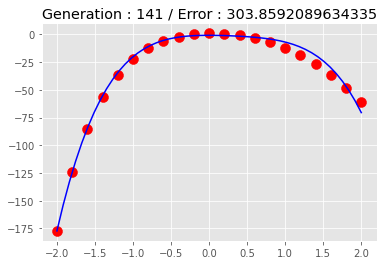

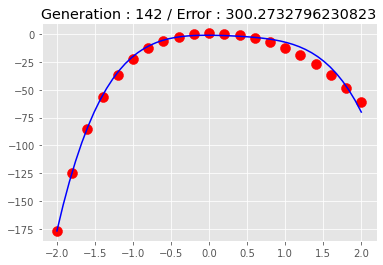

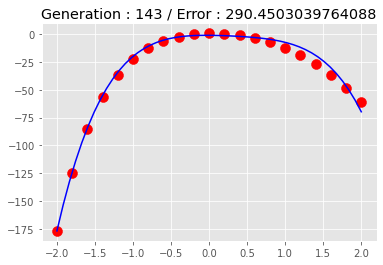

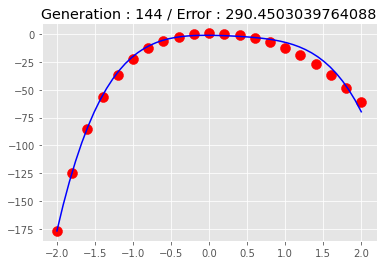

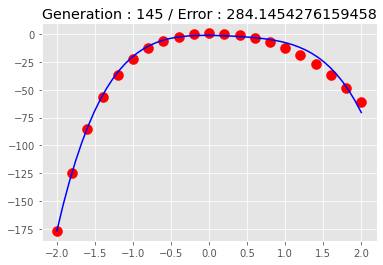

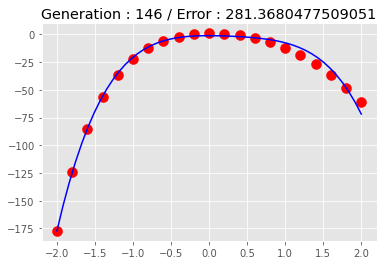

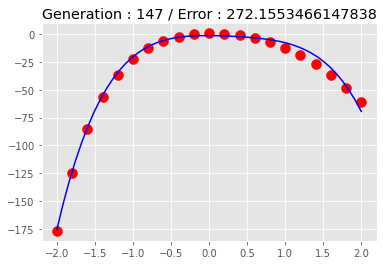

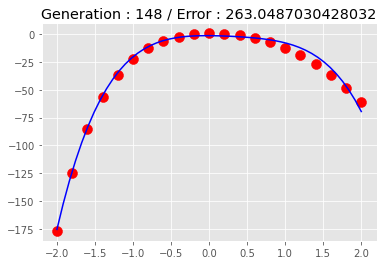

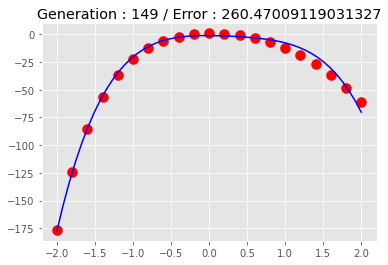

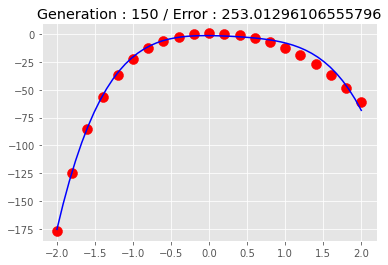

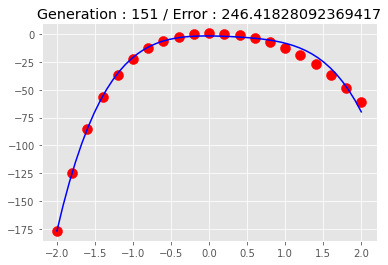

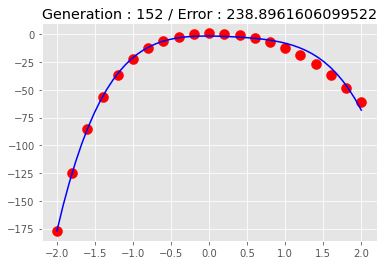

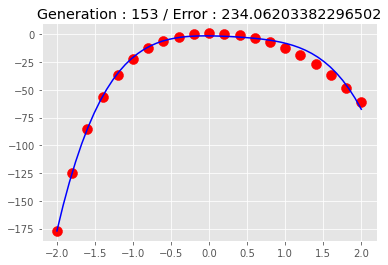

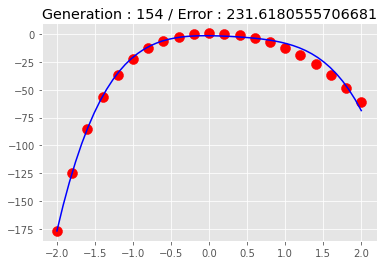

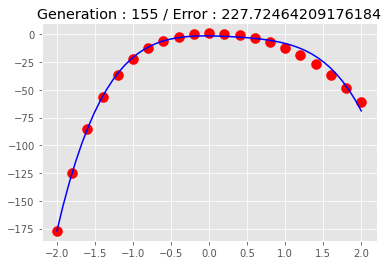

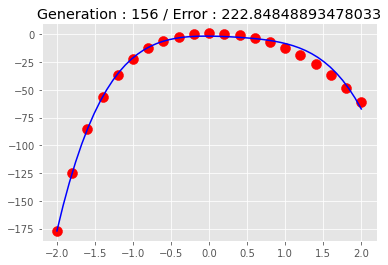

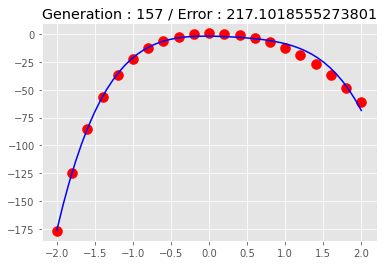

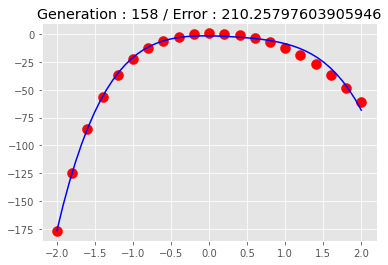

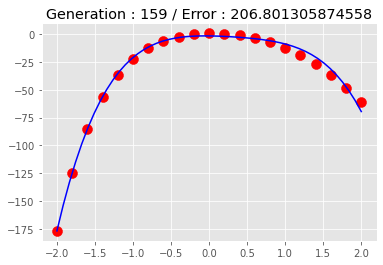

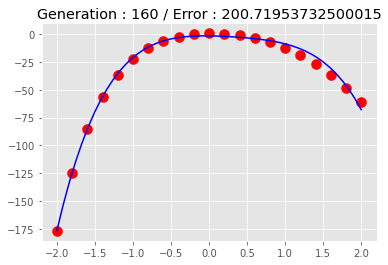

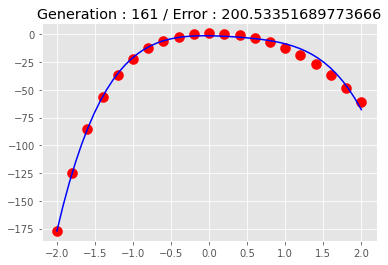

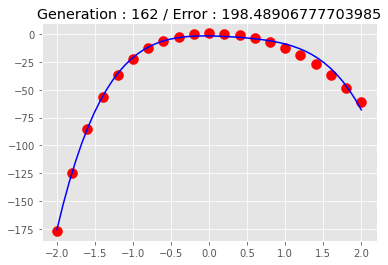

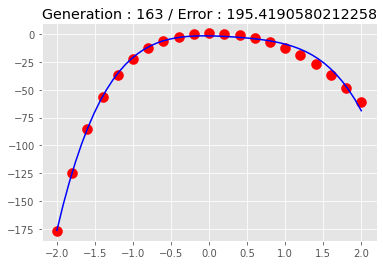

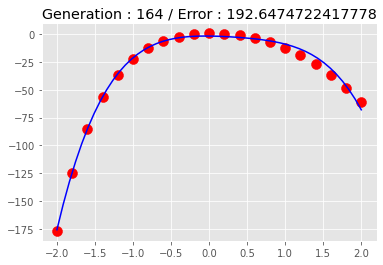

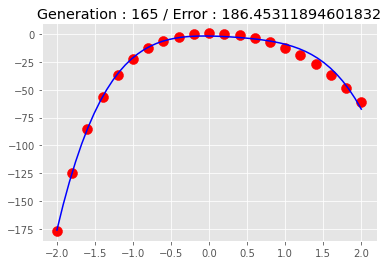

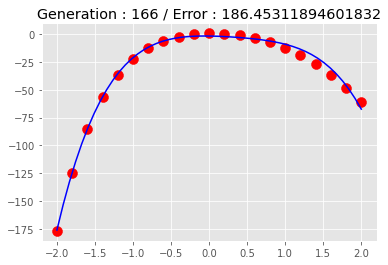

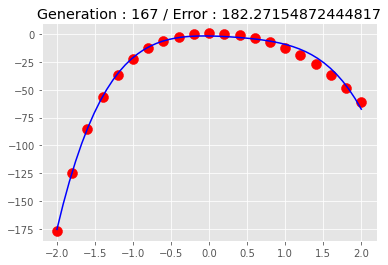

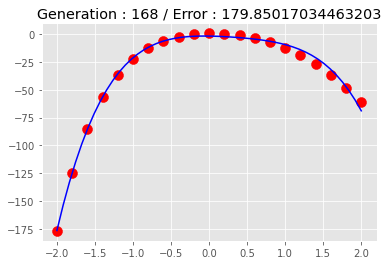

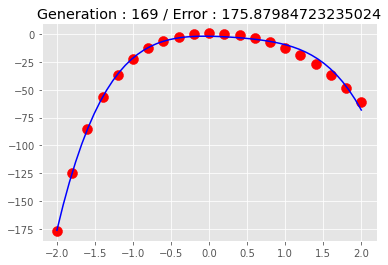

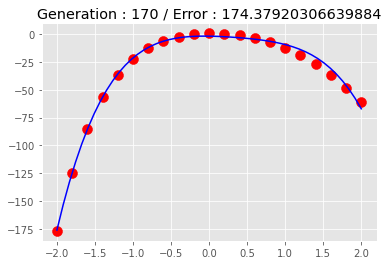

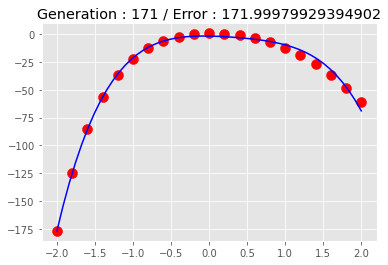

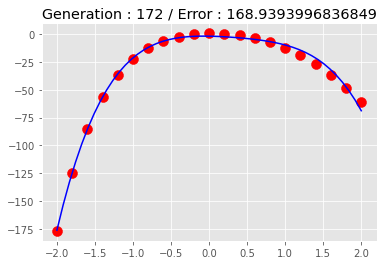

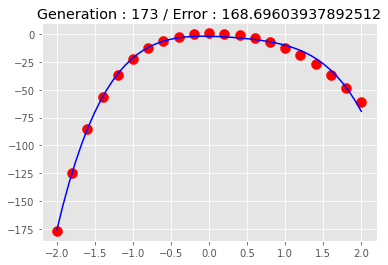

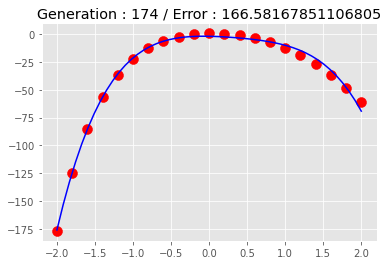

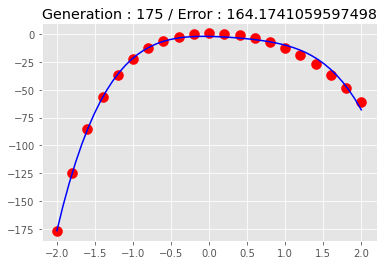

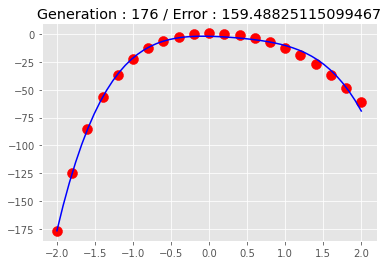

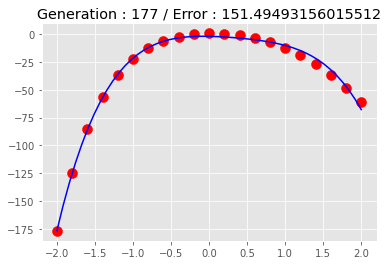

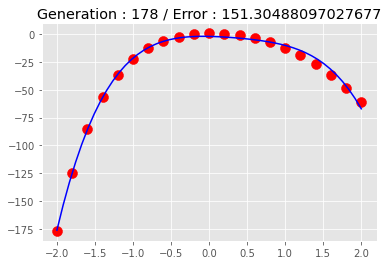

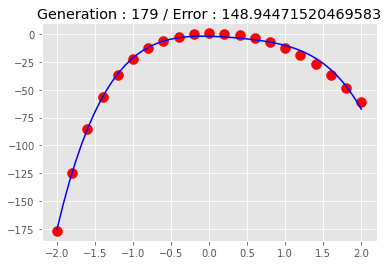

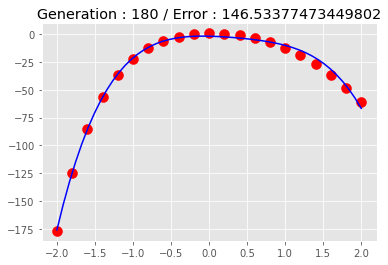

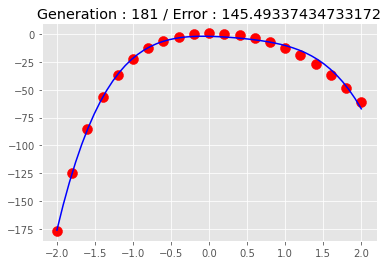

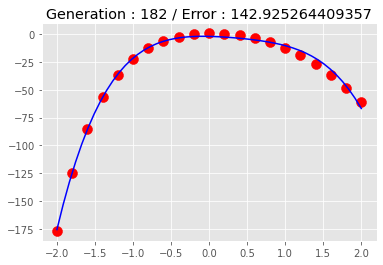

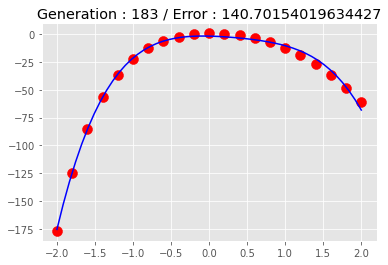

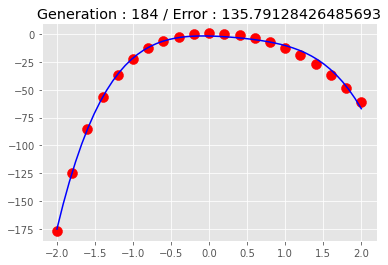

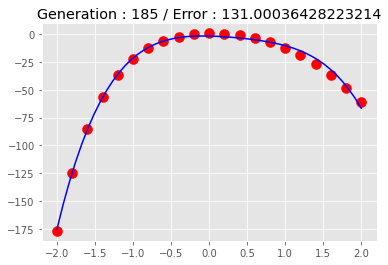

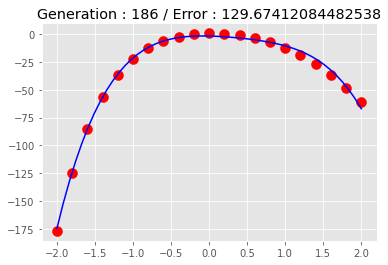

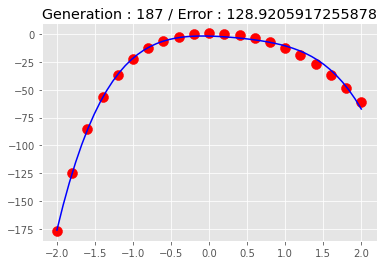

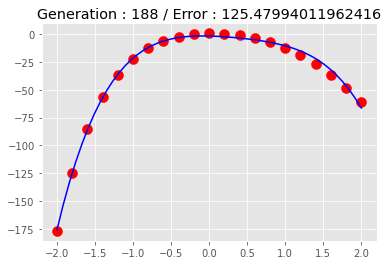

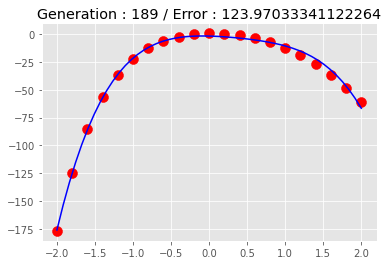

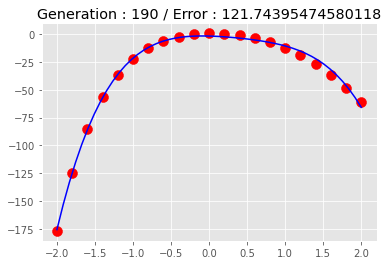

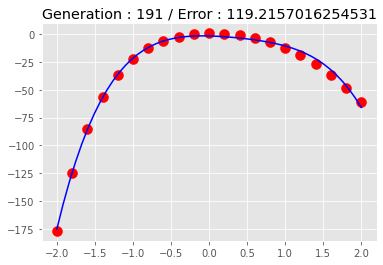

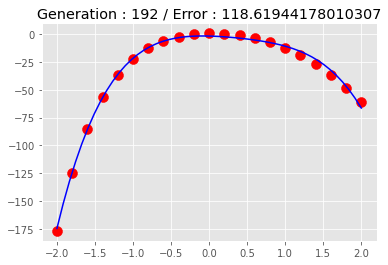

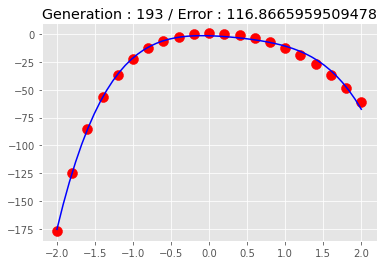

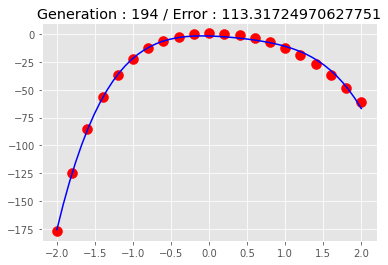

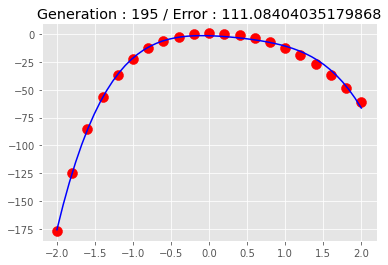

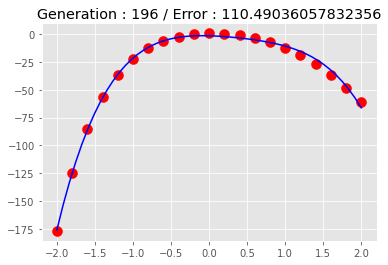

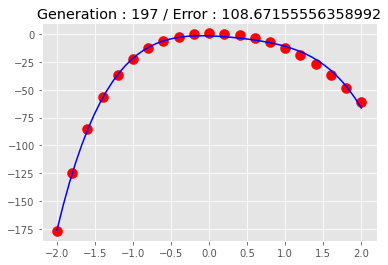

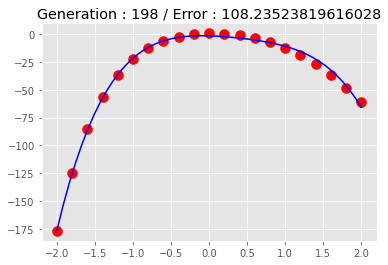

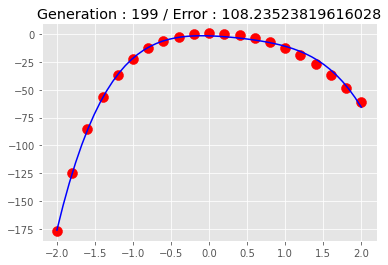

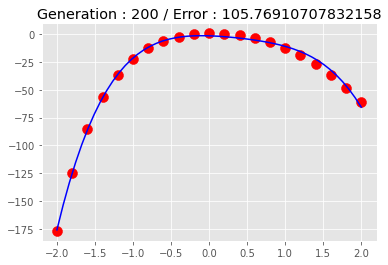

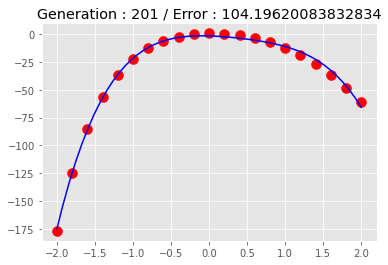

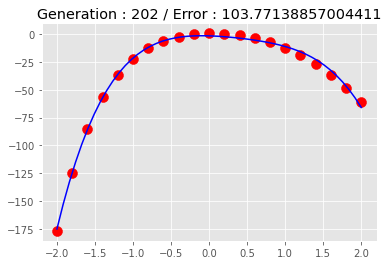

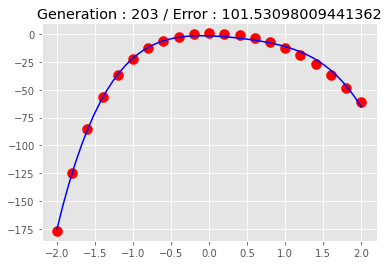

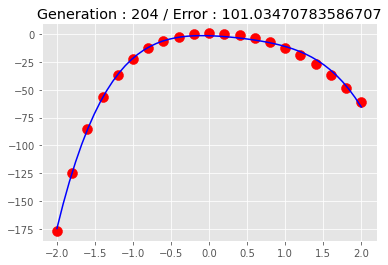

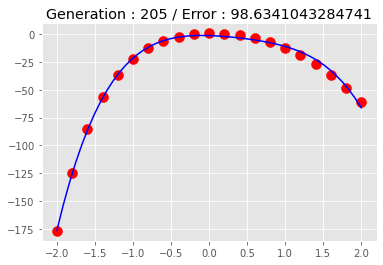

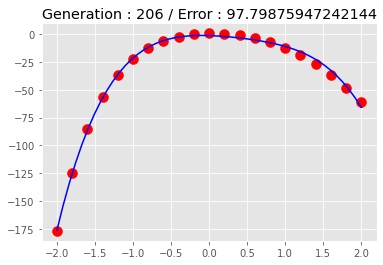

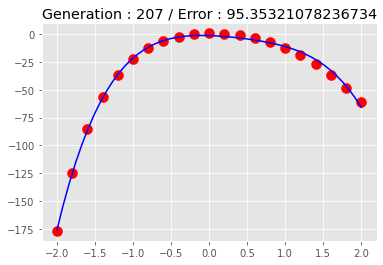

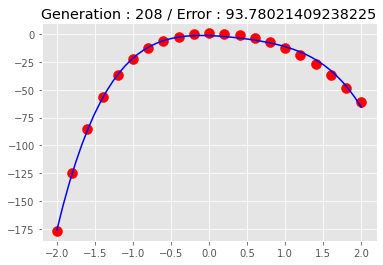

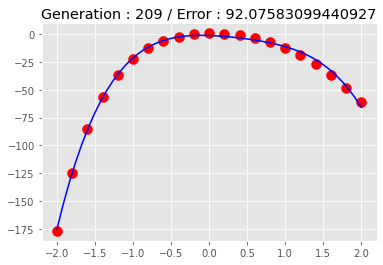

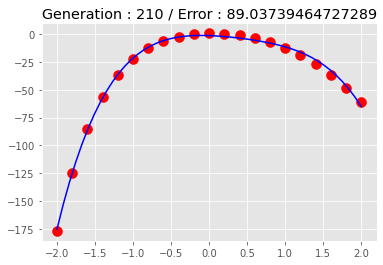

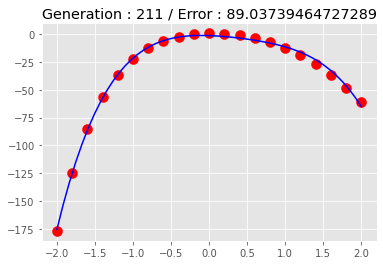

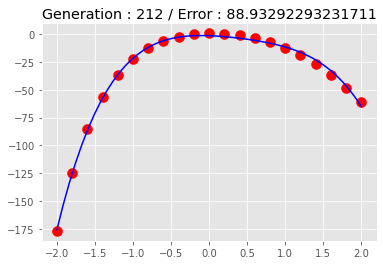

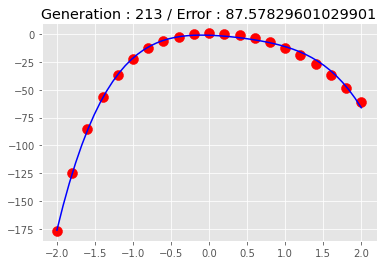

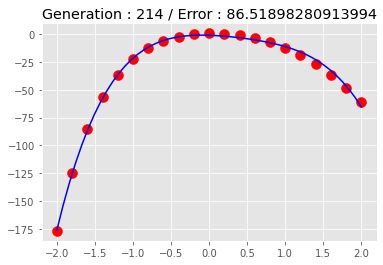

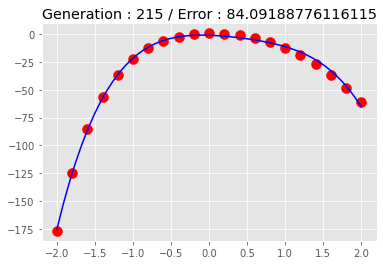

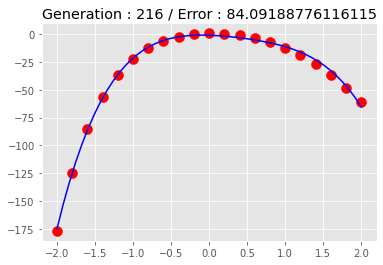

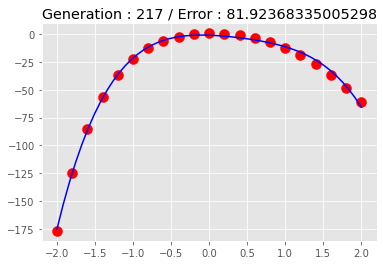

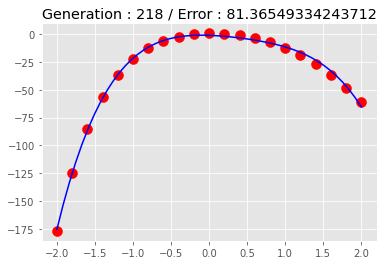

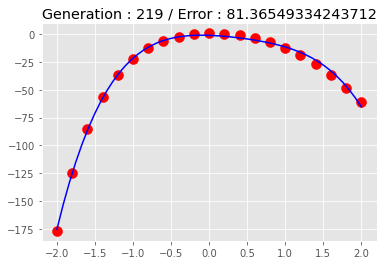

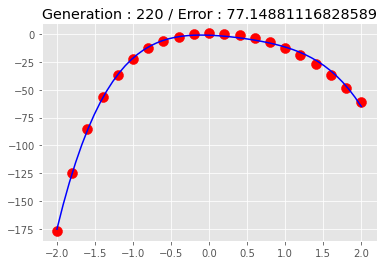

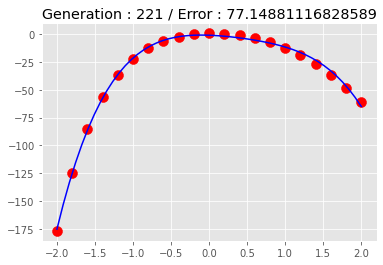

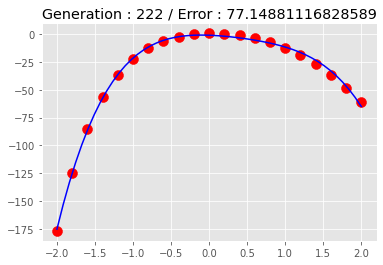

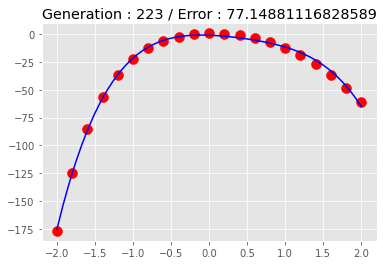

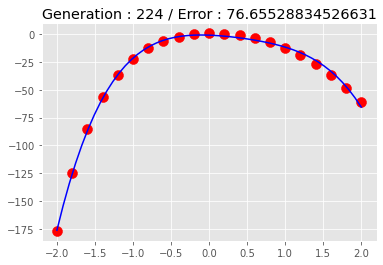

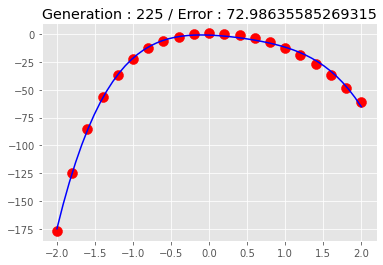

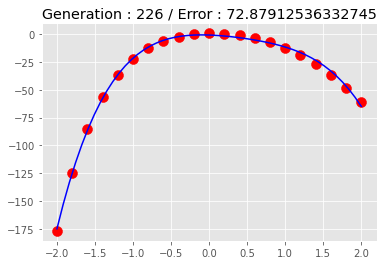

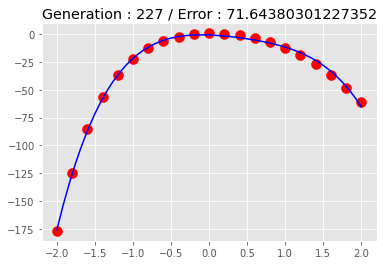

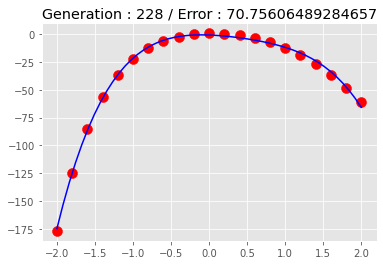

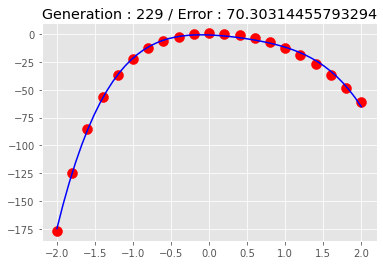

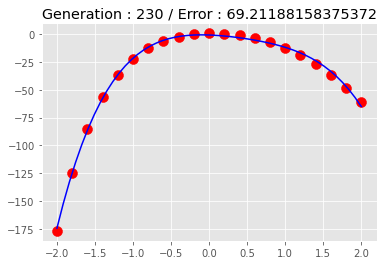

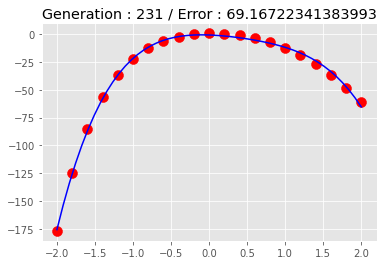

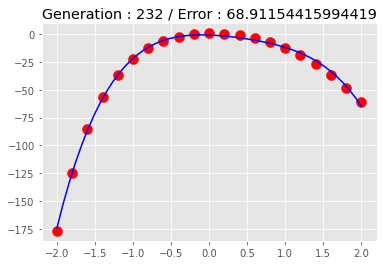

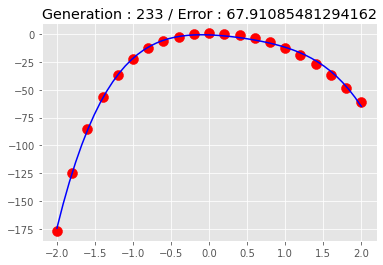

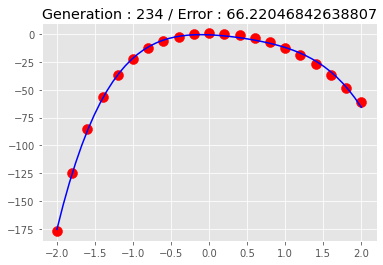

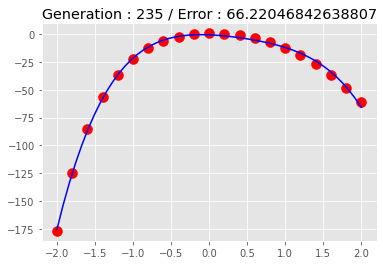

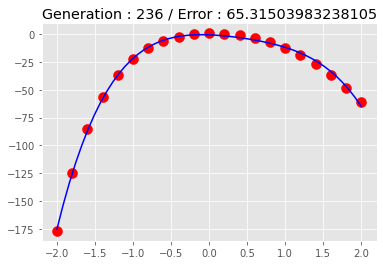

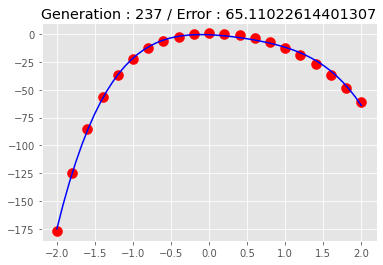

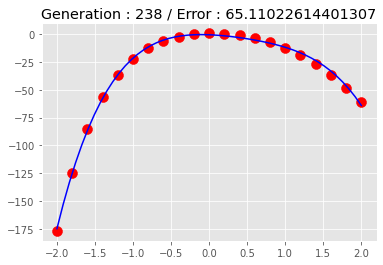

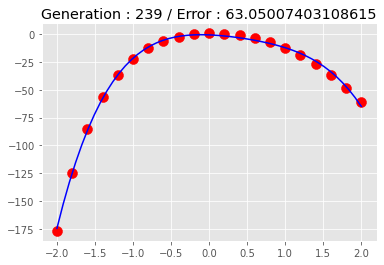

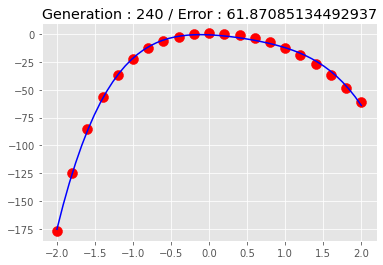

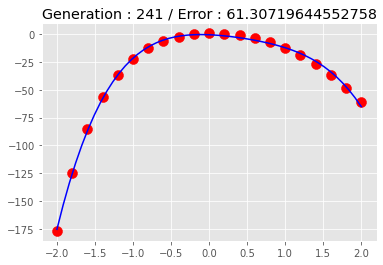

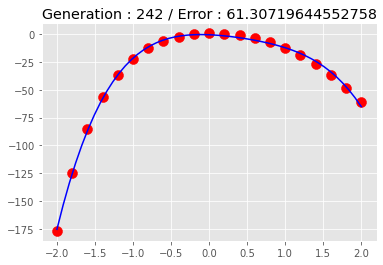

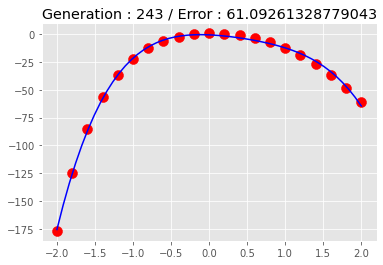

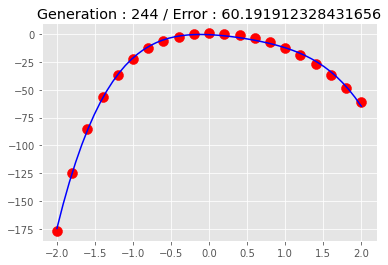

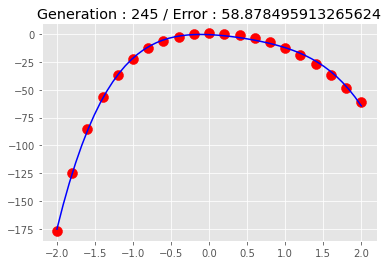

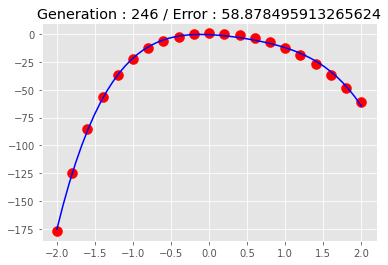

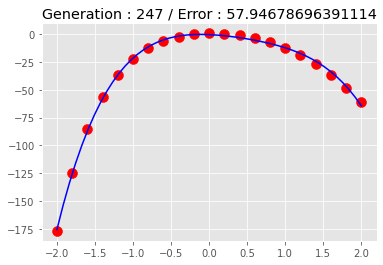

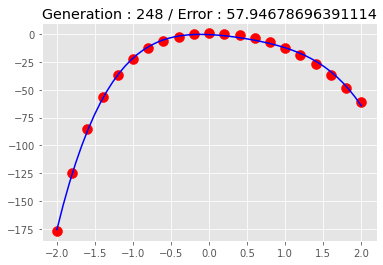

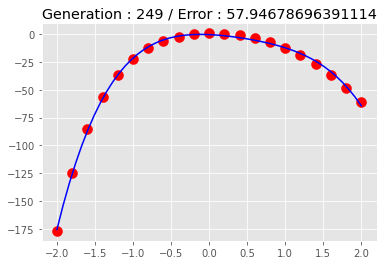

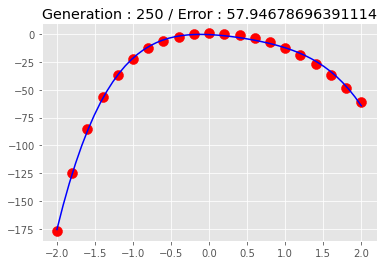

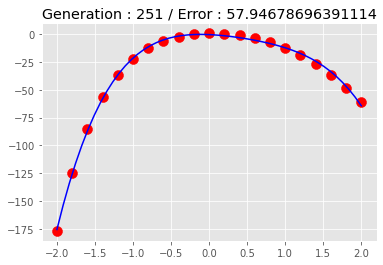

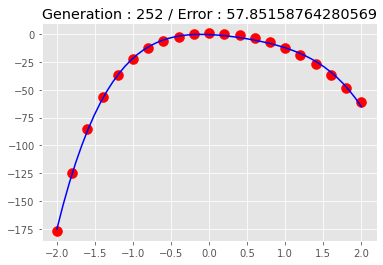

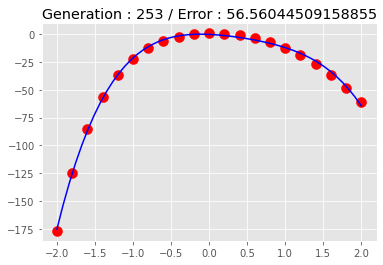

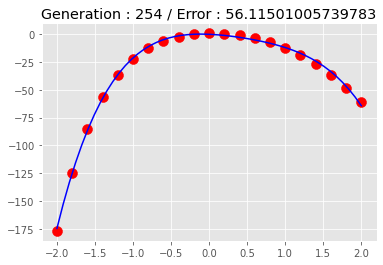

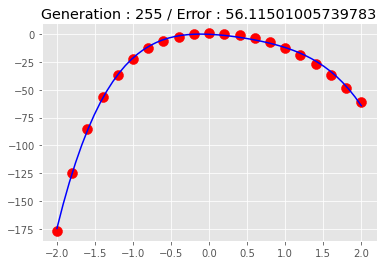

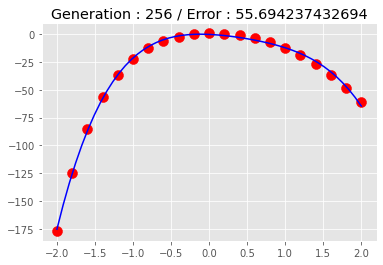

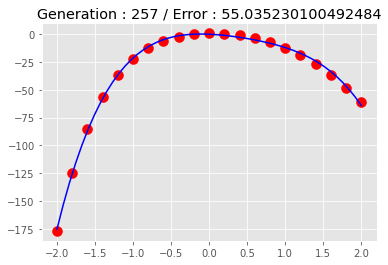

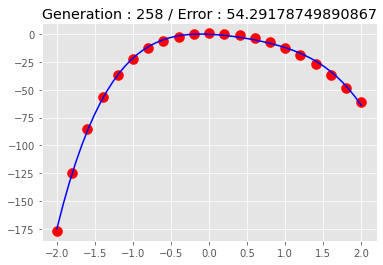

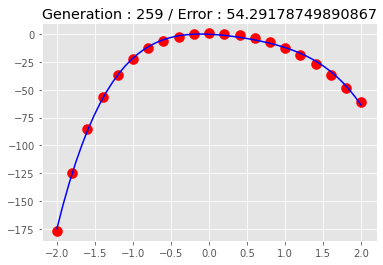

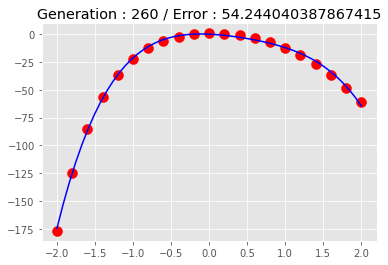

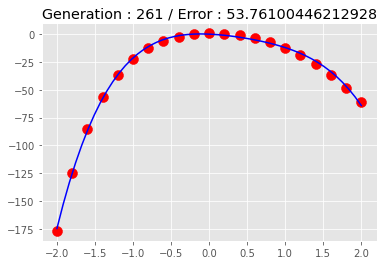

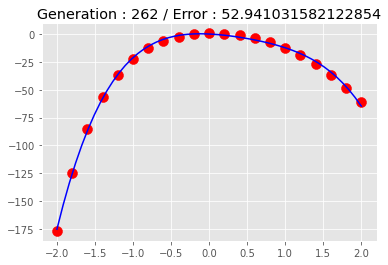

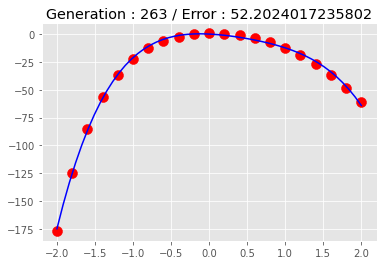

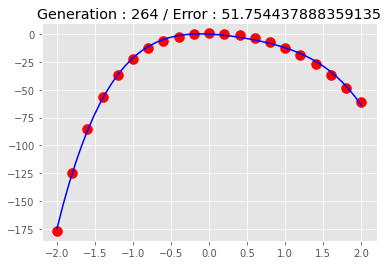

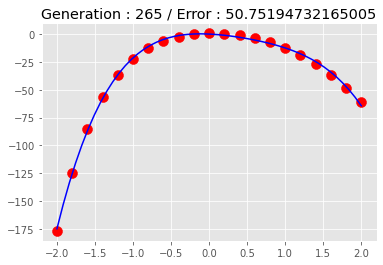

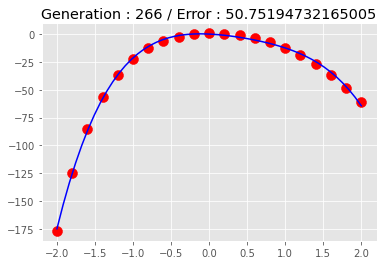

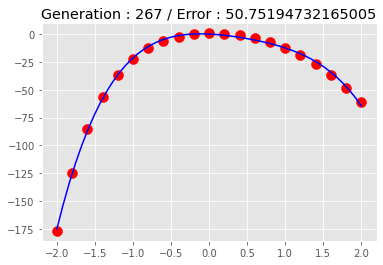

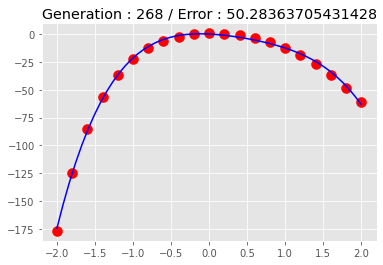

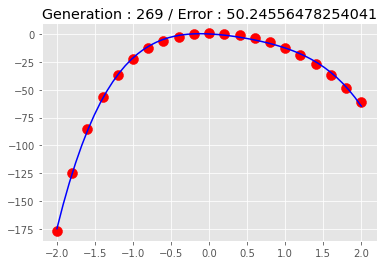

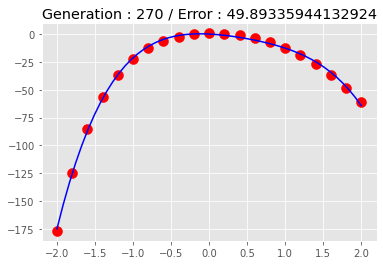

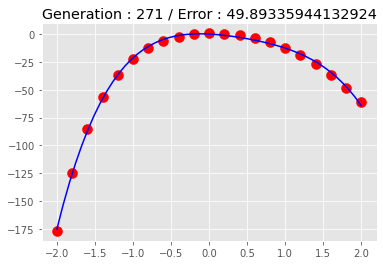

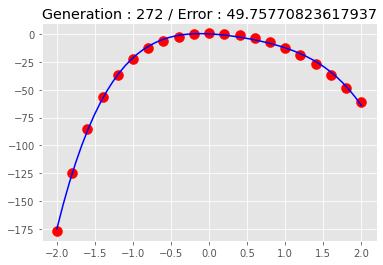

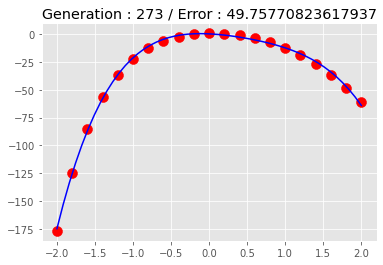

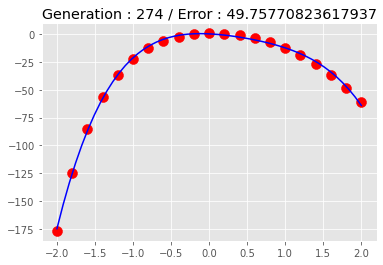

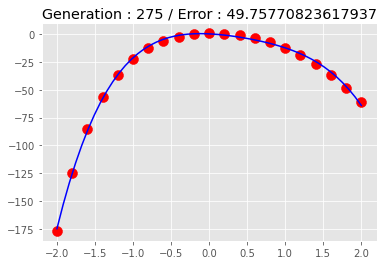

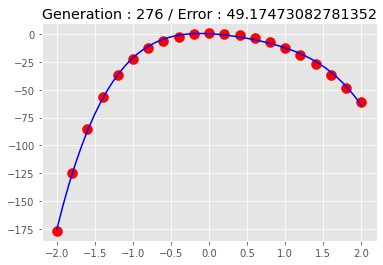

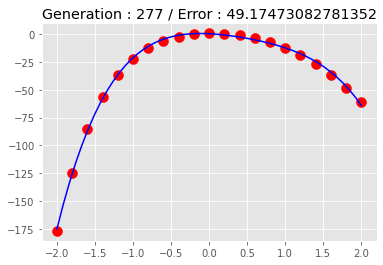

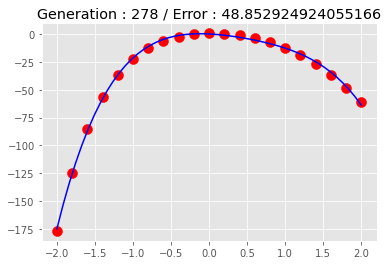

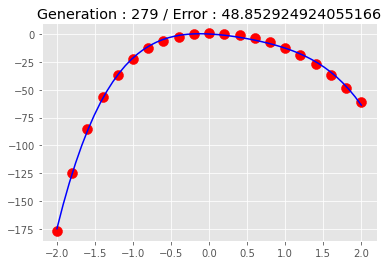

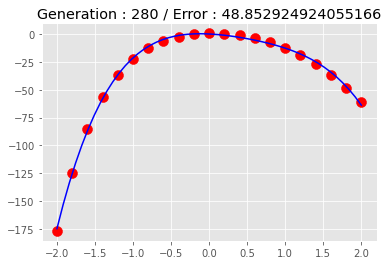

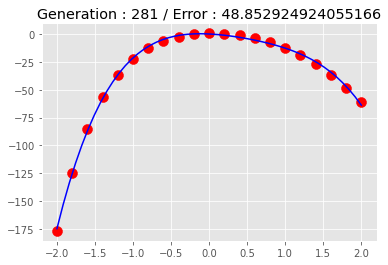

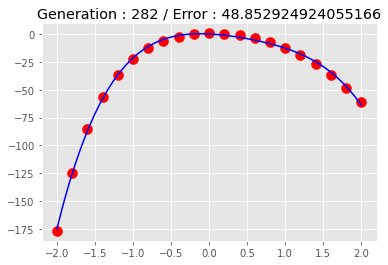

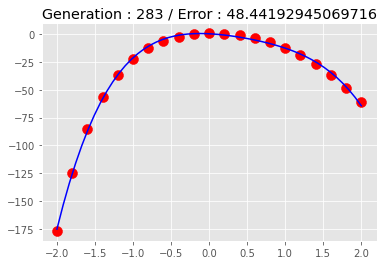

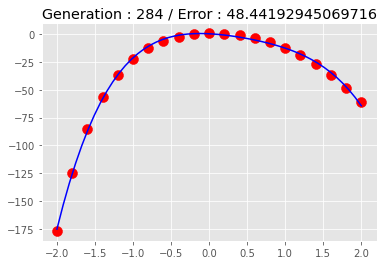

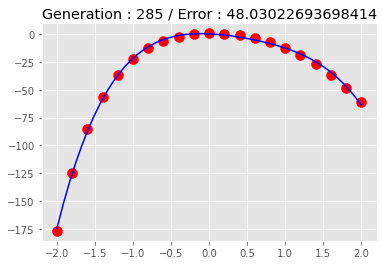

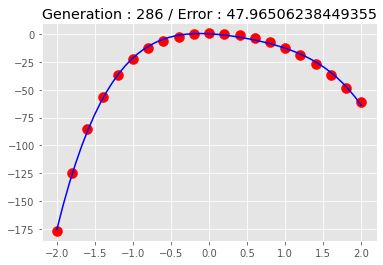

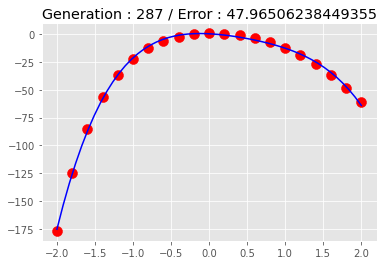

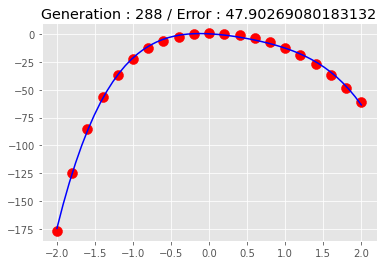

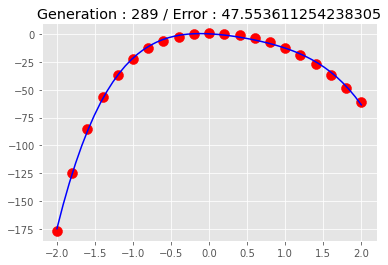

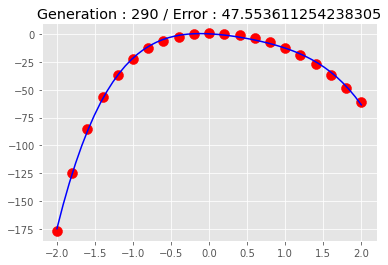

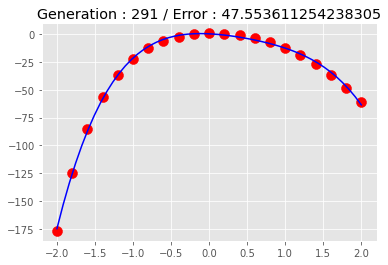

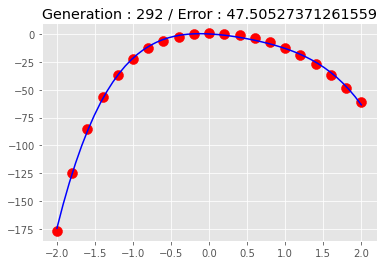

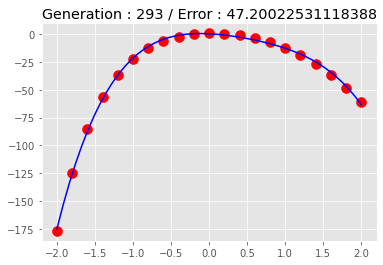

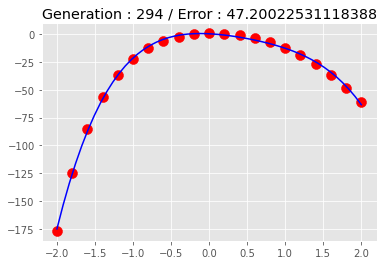

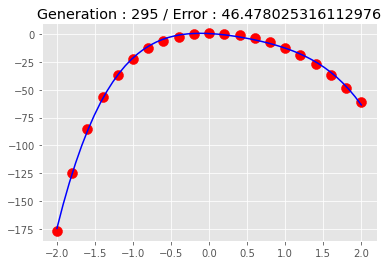

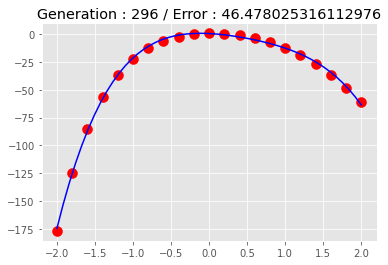

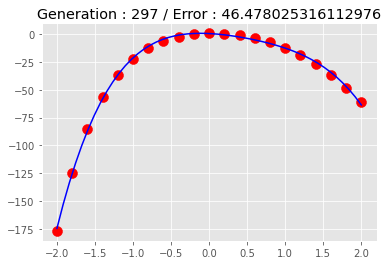

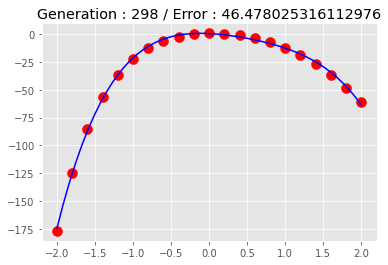

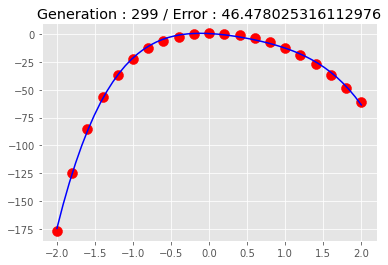

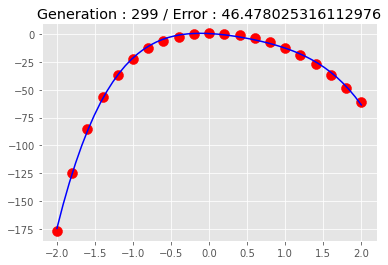

In [7]:
import pandas as pd
# from lib.classes import Population
import matplotlib.pyplot as plt
import numpy as np
import time
from pylab import savefig

plt.style.use('ggplot')

startTime = time.time()

# Open the data points
df = pd.read_csv('data/test.csv')
function = 'polynomial'

# Create the lookup table
lookupTable = {}
for i, record in df.iterrows():
    key = record['X']
    lookupTable[key] = record[function]

# Parameters
generations = 300
degrees = 4
variables = 1

# Initialize a population
polynomials = Population(degrees, variables)
polynomials.evaluate(lookupTable)
polynomials.sort()

# Iterate through generations
for g in range(generations):
    # Enhance the population
    polynomials.enhance(lookupTable)
    # Display the improvement
    polynomials.plot2D(df['X'], df[function], g)
    #savefig('gif/{0}'.format(g))

# Display the final best polynomial
polynomials.plot2D(df['X'], df[function], g)

In [12]:
data = pd.read_csv('/content/pathAB_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)

In [14]:
data.describe()

0
count  21312.000000
mean      -0.950157
std        4.345763
min      -30.613000
25%       -2.829525
50%       -0.148310
75%        1.844975
max        9.200100

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


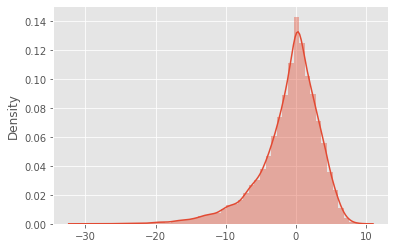

In [52]:
import seaborn as sns

sns.distplot(data, hist=True)

In [54]:
data2 = data.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


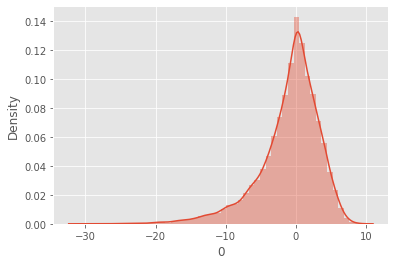

In [56]:
data = []
for idx, var in enumerate(list(data2)):
    myPlot = sns.distplot(data2[var])
    
    # Fine Line2D objects
    lines2D = [obj for obj in myPlot.findobj() if str(type(obj)) == "<class 'matplotlib.lines.Line2D'>"]
    
    # Retrieving x, y data
    x, y = lines2D[idx].get_data()[0], lines2D[idx].get_data()[1]
    
    # Store as dataframe 
    data.append(pd.DataFrame({'x':x, 'y':y}))

In [74]:
df[0].shape

(200, 2)

In [93]:
for i in range(200):
  key = df['x'][i]
  lookupTable[key] = df['y'][i]

In [88]:
|df['x']

0     -32.389080
1     -32.171164
2     -31.953248
3     -31.735332
4     -31.517416
         ...    
195    10.104516
196    10.322432
197    10.540348
198    10.758264
199    10.976180
Name: x, Length: 200, dtype: float64

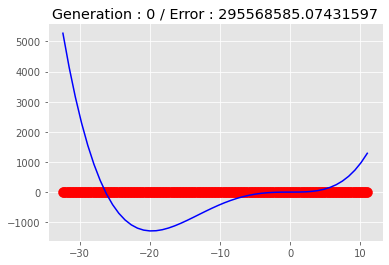

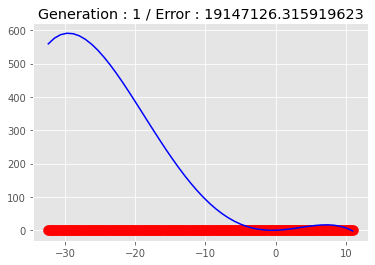

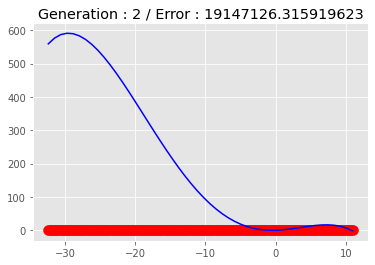

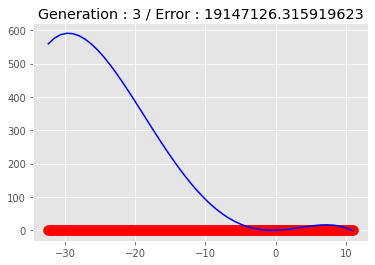

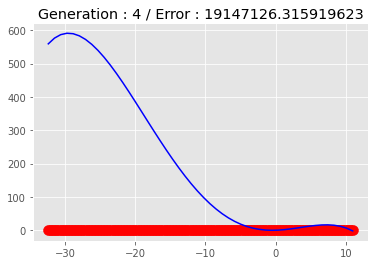

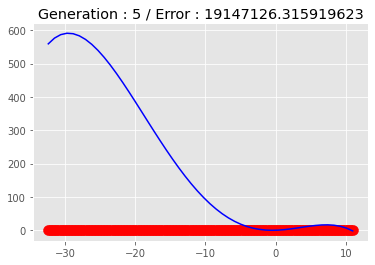

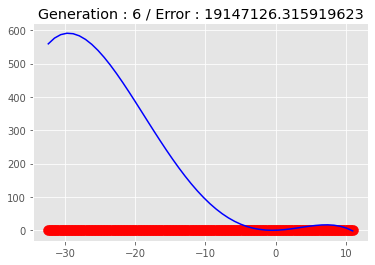

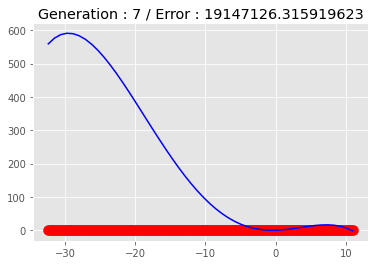

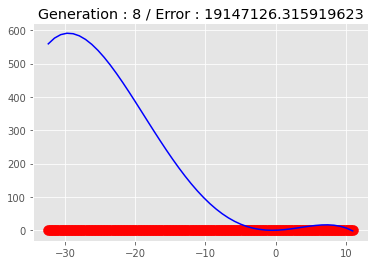

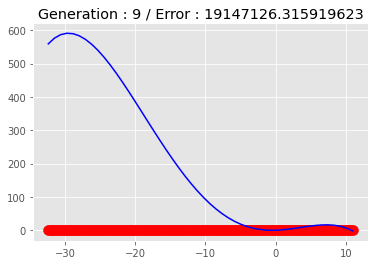

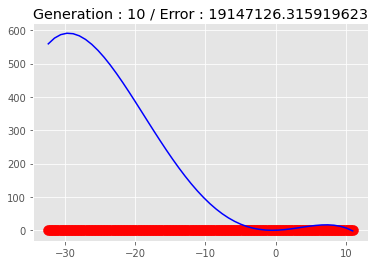

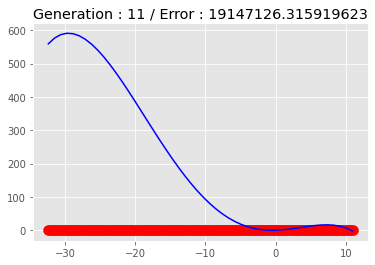

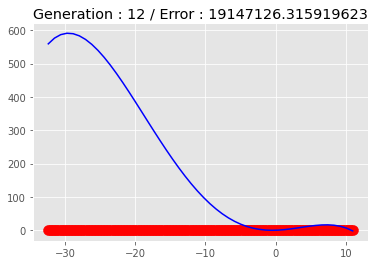

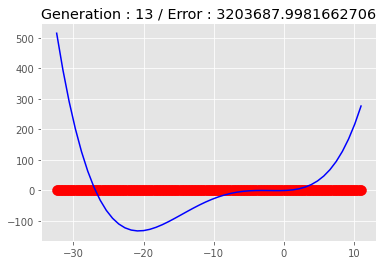

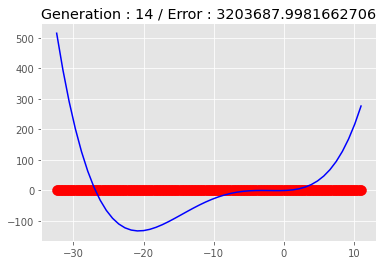

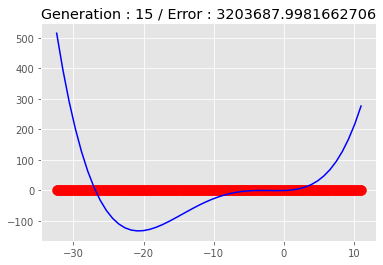

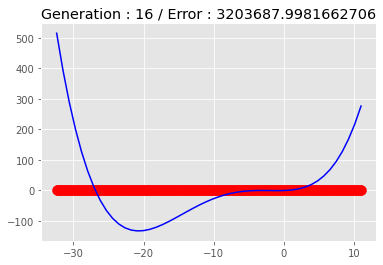

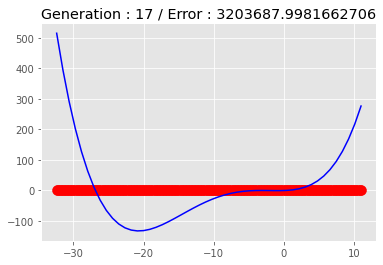

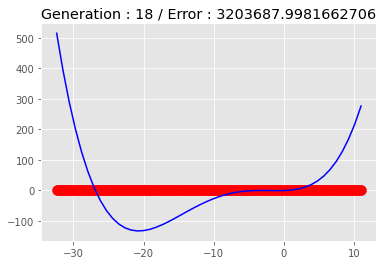

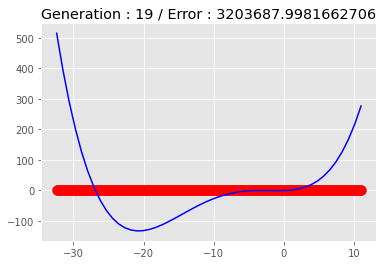

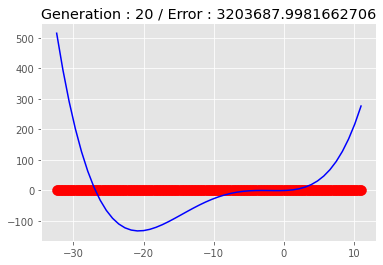

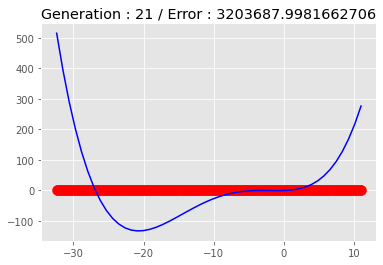

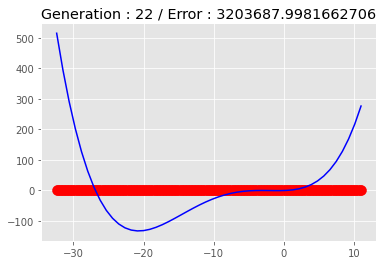

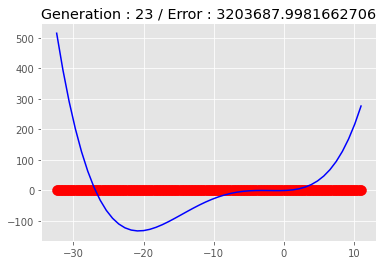

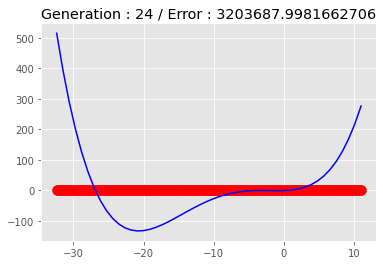

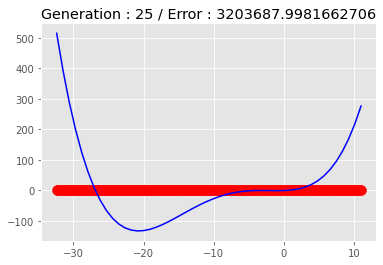

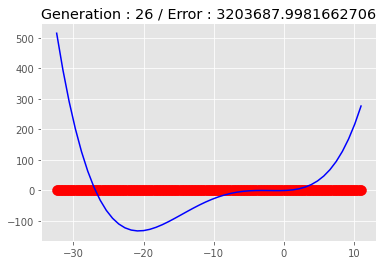

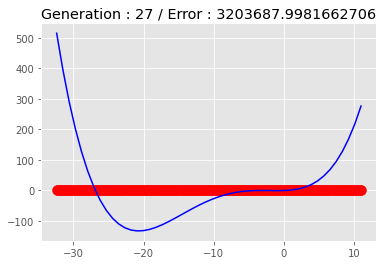

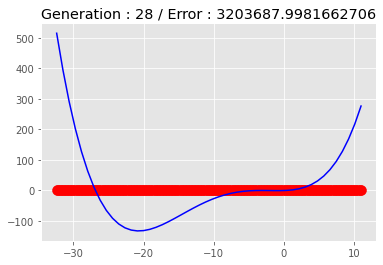

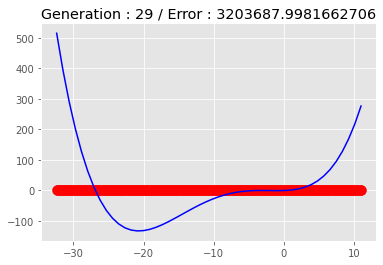

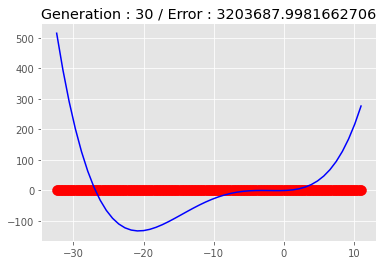

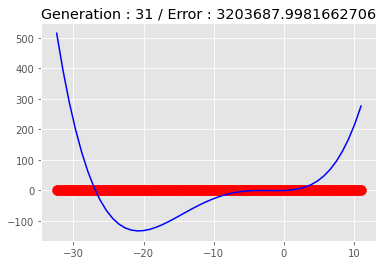

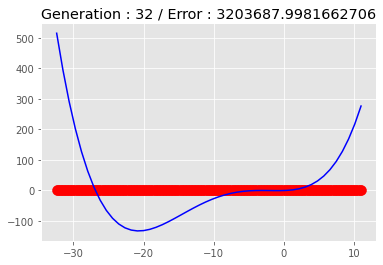

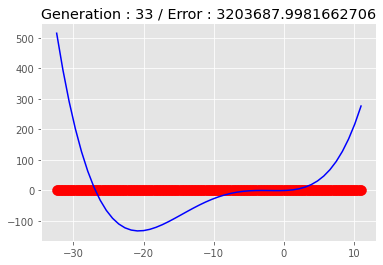

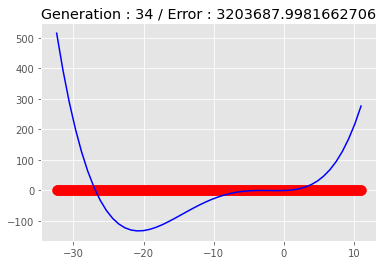

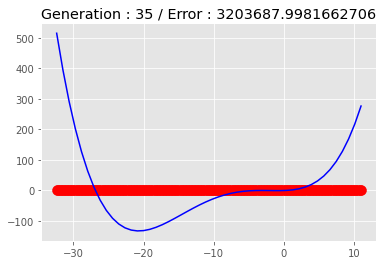

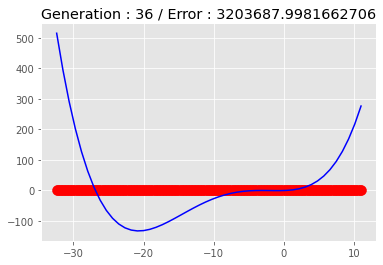

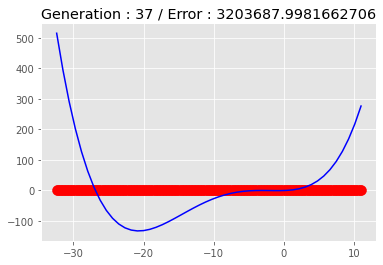

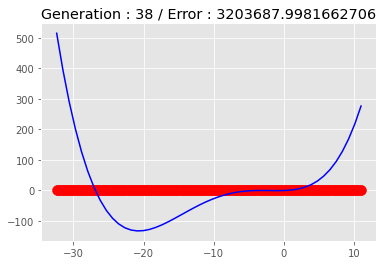

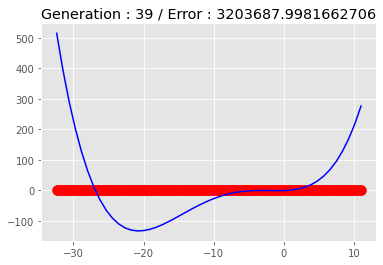

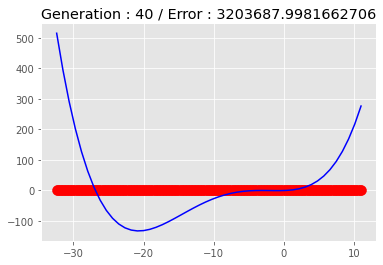

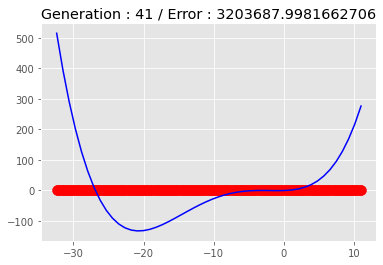

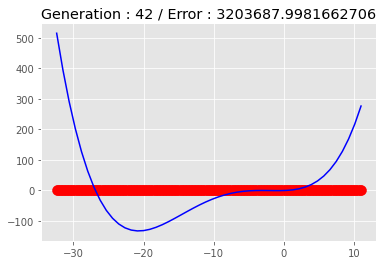

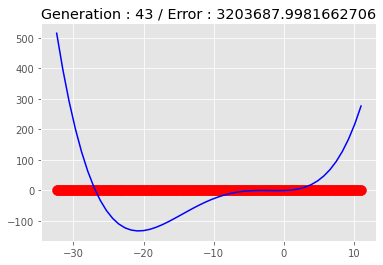

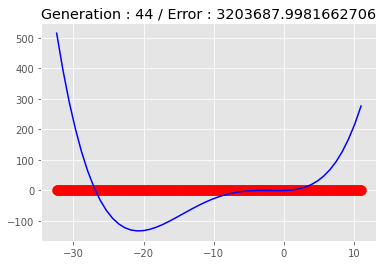

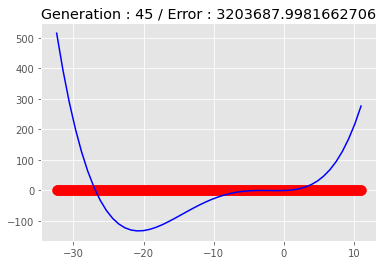

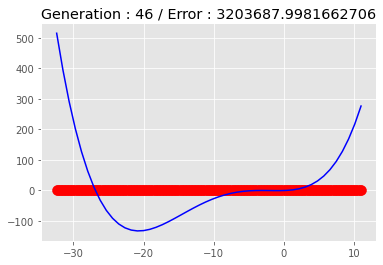

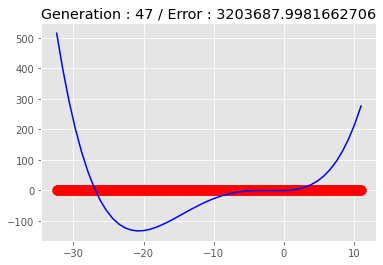

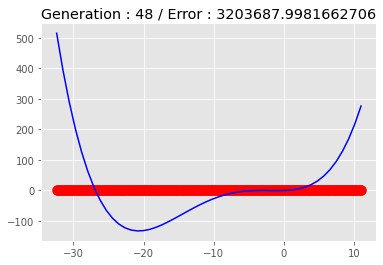

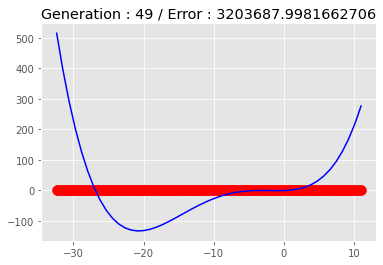

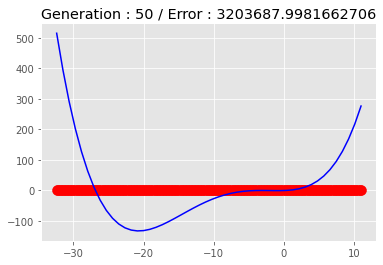

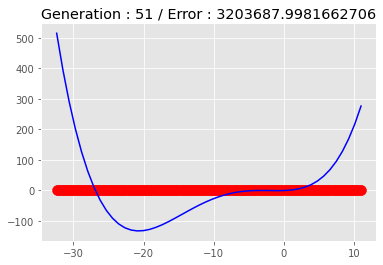

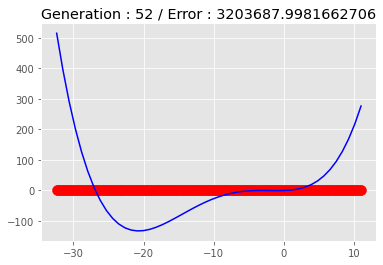

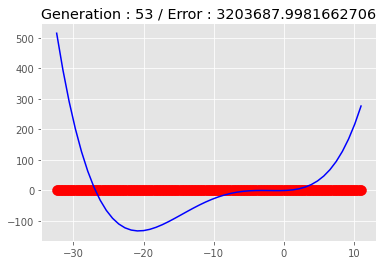

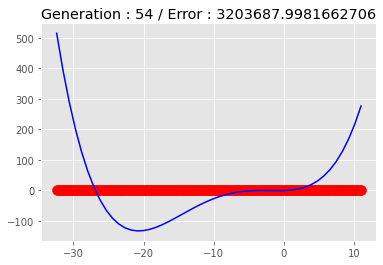

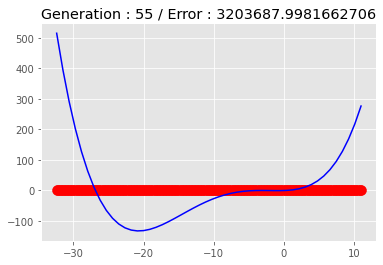

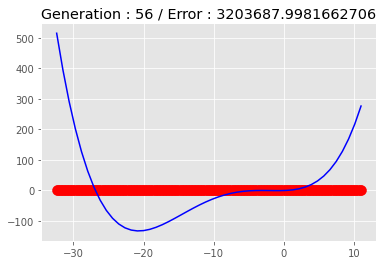

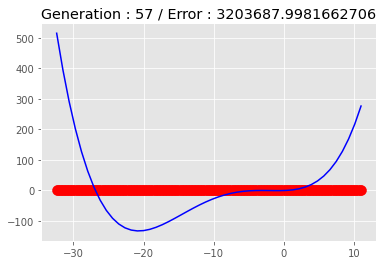

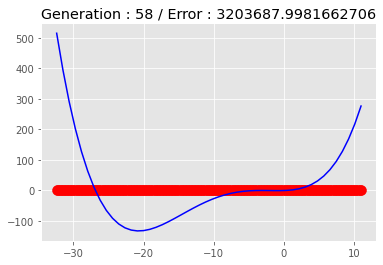

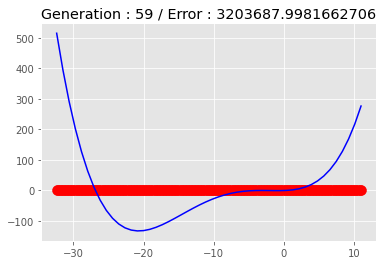

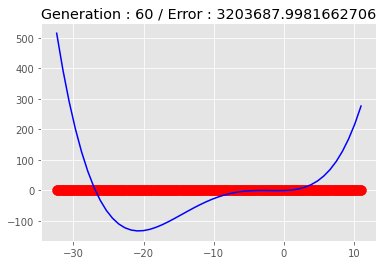

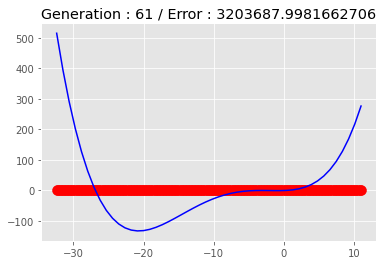

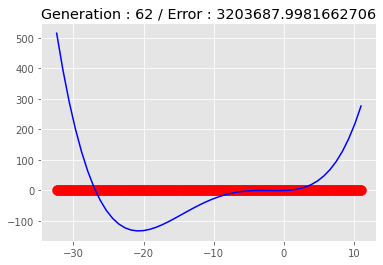

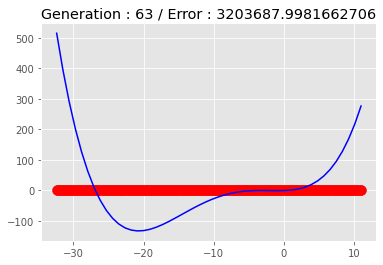

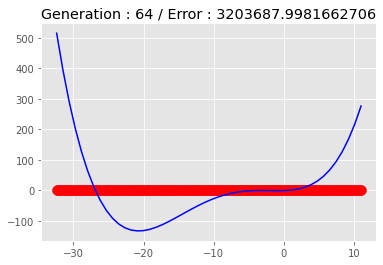

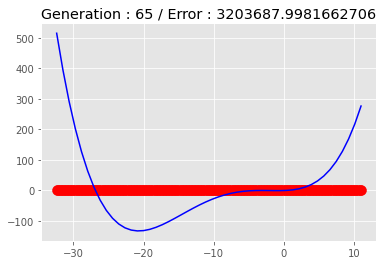

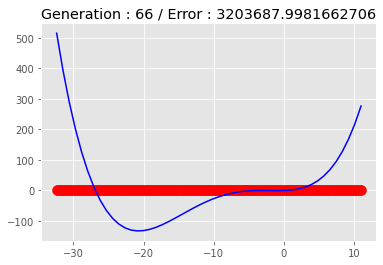

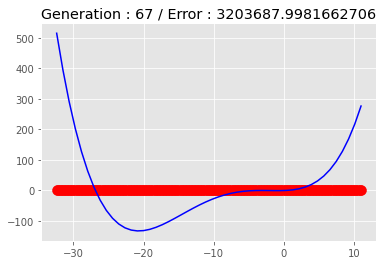

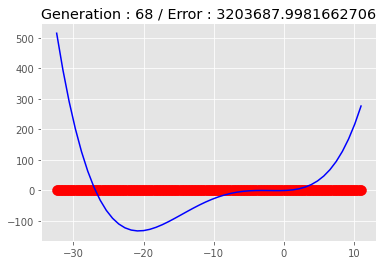

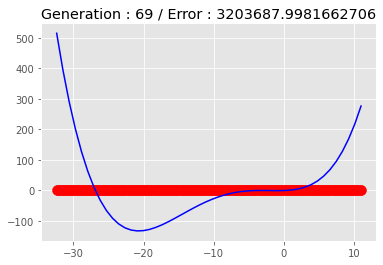

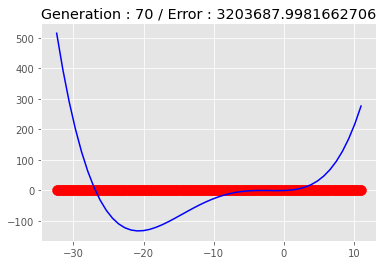

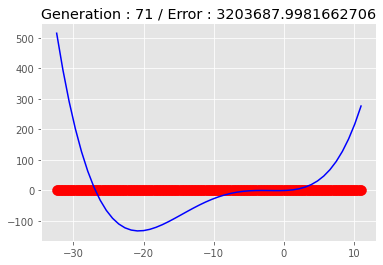

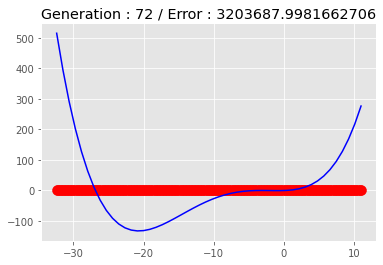

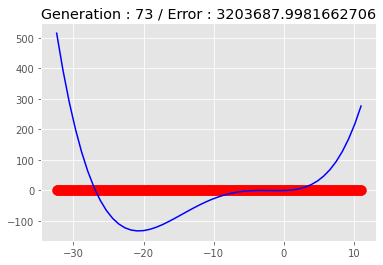

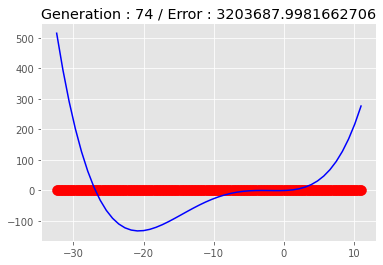

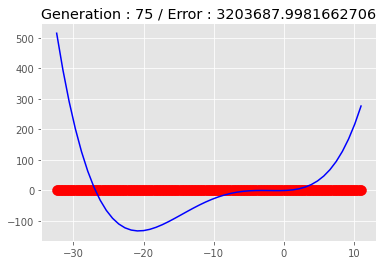

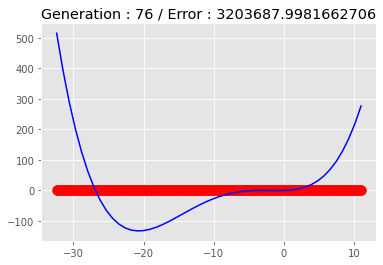

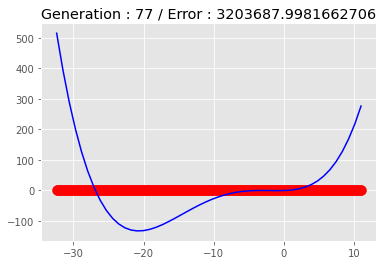

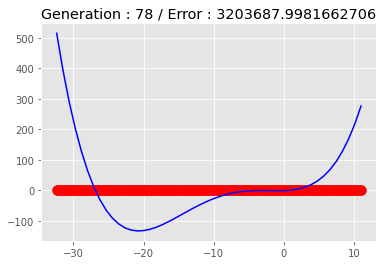

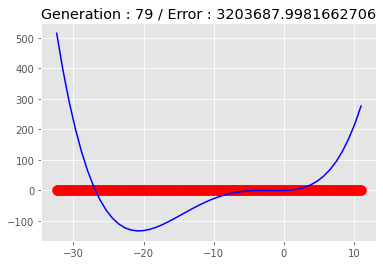

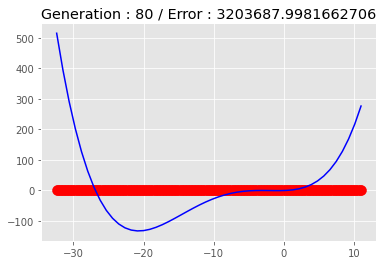

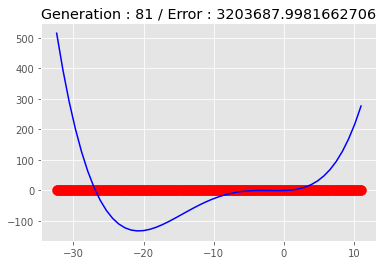

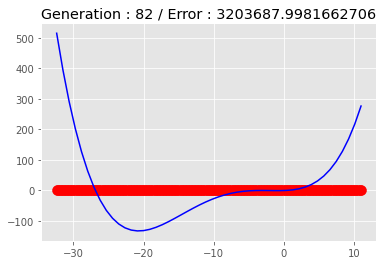

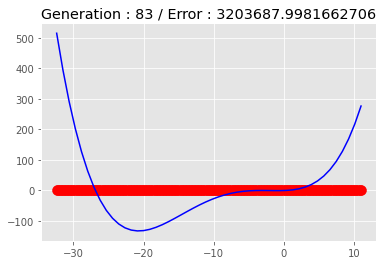

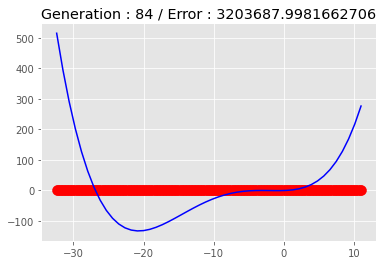

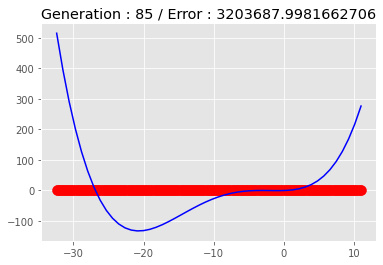

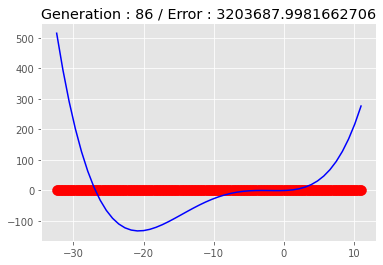

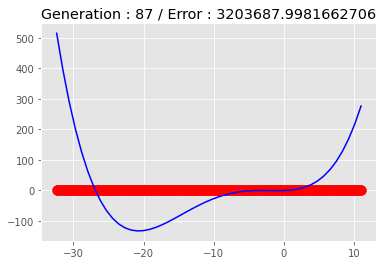

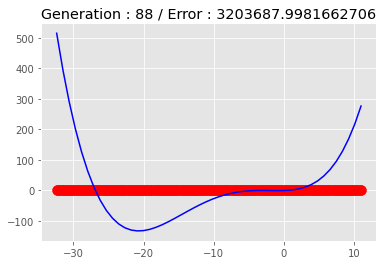

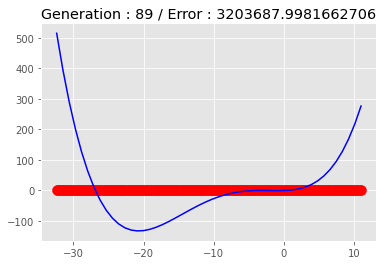

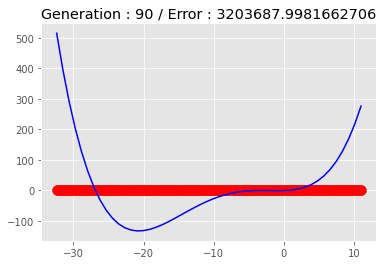

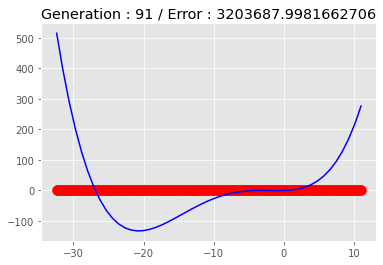

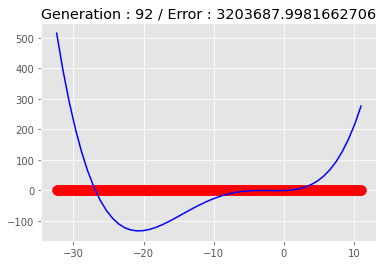

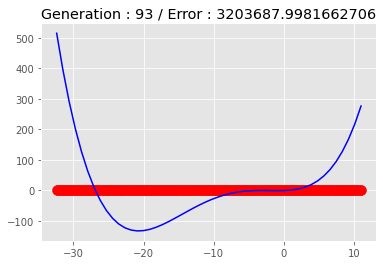

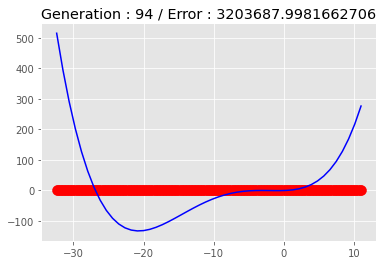

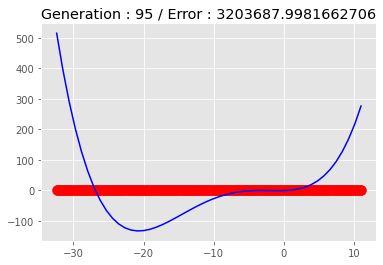

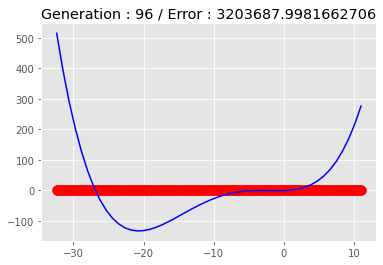

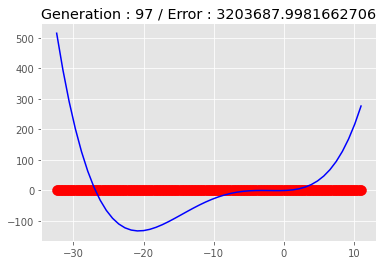

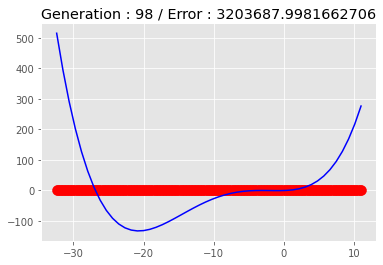

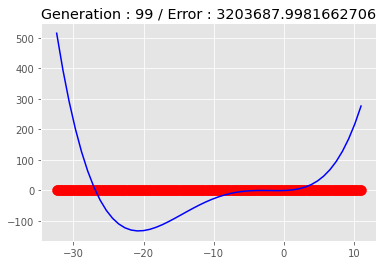

KeyboardInterrupt: ignored

In [97]:
import pandas as pd
# from lib.classes import Population
import matplotlib.pyplot as plt
import numpy as np
import time
from pylab import savefig

plt.style.use('ggplot')

startTime = time.time()

# Open the data points
df = data.copy()
df = df[0].copy()
# df = pd.read_csv('data/test.csv')
# function = 'polynomial'

### CONSTRUCT LOOKUP TABLE

# Create the lookup table

# for i, record in df.iterrows():
#     key = record['X']
#     lookupTable[key] = record[function]
lookupTable = {}
for i in range(len(df)):
  key = df['x'][i]
  lookupTable[key] = df['y'][i]

# Parameters
generations = 300
degrees = 4
variables = 1

# Initialize a population
polynomials = Population(degrees, variables)
polynomials.evaluate(lookupTable)
polynomials.sort()

# Iterate through generations
for g in range(generations):
    # Enhance the population
    polynomials.enhance(lookupTable)
    # Display the improvement
    polynomials.plot2D(df['X'], df[function], g)
    #savefig('gif/{0}'.format(g))

# Display the final best polynomial
polynomials.plot2D(df['X'], df[function], g)

In [99]:
lookupTable

{-32.389079813395355: 3.5125327387166163e-07,
 -32.17116393587379: 9.903144341792471e-07,
 -31.953248058352234: 2.4383087791357974e-06,
 -31.73533218083067: 5.242940825473086e-06,
 -31.51741630330911: 9.845905789752627e-06,
 -31.29950042578755: 1.6151157488993246e-05,
 -31.081584548265987: 2.3154833298500503e-05,
 -30.863668670744424: 2.905702303728486e-05,
 -30.645752793222865: 3.207041798984993e-05,
 -30.427836915701302: 3.1576948616285754e-05,
 -30.209921038179743: 2.88510377003891e-05,
 -29.99200516065818: 2.6750615747117536e-05,
 -29.774089283136618: 2.8446470896435853e-05,
 -29.55617340561506: 3.583242815466252e-05,
 -29.338257528093497: 4.839787883895722e-05,
 -29.120341650571934: 6.31512001330557e-05,
 -28.902425773050375: 7.575505021128096e-05,
 -28.684509895528812: 8.238933145557207e-05,
 -28.46659401800725: 8.134936925313059e-05,
 -28.24867814048569: 7.35592819385101e-05,
 -28.030762262964128: 6.19590239055661e-05,
 -27.81284638544257: 5.0333855040361004e-05,
 -27.5949305079